# Problem Statement:

The market for logistics analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how logistics
organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Logistics leaders may use this
data to address supply chain difficulties, cut costs, and enhance service levels all at the
same time.

The main goal is to predict the consignment pricing based on the available factors in the
dataset.

# Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

* ASN/DN:In the context of consignment shipping pricing prediction, ASN/DN information can be valuable for tracking and verifying shipments, ensuring that the correct products and quantities are delivered, and maintaining accurate records of transactions. These documents help facilitate smooth logistics operations, reduce errors, and improve supply chain efficiency.

* In consignment pricing prediction, "Freight Cost" refers to the cost associated with transporting goods or consignments from the supplier or seller to the buyer or consignee. It represents the expenses incurred to move the goods from the point of origin (e.g., manufacturing site or warehouse) to the destination (e.g., customer's location).Freight costs can include various components, such as(Shipping Charges:,Handling Fees:,Insurance:,Customs Duties and Taxes,Transportation Mode,Packaging Cost)

* PO/SO # : In consignment pricing, "PO/SO #" refers to the Purchase Order (PO) or Sales Order (SO) number. These are unique identifiers assigned to specific transactions between a buyer and a seller.

* Weight :The role of weight in KG (kilograms) in consignment pricing is significant, especially in the context of logistics and transportation costs. Weight plays a crucial role in determining the total transportation expenses, as many shipping companies and carriers use weight-based pricing models.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as pe 
import cufflinks as cf

In [2]:
df=pd.read_csv("F:\Shipping_Pricing_Prediction\SCMS_Delivery_History_Dataset.csv")

In [3]:
df.shape

(10324, 33)

In [4]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0                 13             780.34                       NaN  
1                358             4521.5                       NaN  
2                171            1653.78                       NaN  
3               1855           16007.06                       NaN  
4               7590           45450.08                       NaN  

[5 rows x 33 columns]

In [5]:
df.tail()

ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  ...  \
10319   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10320   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10321   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10322   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10323   PMO - US    From RDC   N/A - From RDC         Truck  ...   

      Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
10319                         60             166571       599655.60   
10320                         60              21072       137389.44   
10321                         30             514526      5140114.74   
10322                         60              17465       113871.80   
10323                         60              36639        72911.61   

      Pack Price Unit Price              Manufacturing Site  \
10319       3.60       0.06      Mylan,  H-12 & H-13, India   
10320       6.52       0.11    Hetero Unit III Hyderabad IN   
10321       9.99       0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322       6.52       0.11  Mylan (formerly Matrix) Nashik   
10323       1.99       0.03               Cipla, Goa, India   

      First Line Designation          Weight (Kilograms)  \
10319                     No     See DN-4307 (ID#:83920)   
10320                     No     See DN-4313 (ID#:83921)   
10321                     No  Weight Captured Separately   
10322                    Yes                        1392   
10323                     No  Weight Captured Separately   

                       Freight Cost (USD) Line Item Insurance (USD)  
10319             See DN-4307 (ID#:83920)                    705.79  
10320             See DN-4313 (ID#:83921)                    161.71  
10321  Freight Included in Commodity Cost                   5284.04  
10322  Freight Included in Commodity Cost                    134.03  
10323  Freight Included in Commodity Cost                     85.82  

[5 rows x 33 columns]

In [6]:
#replacing spaces from columns names by _
# replacing spaces in column names by _
def replace_space_with_underscore(df):
  new_columns = [col.replace(' ', '_') for col in df.columns]
  df_renamed = df.rename(columns=dict(zip(df.columns, new_columns)))
  return df_renamed

In [7]:
df=replace_space_with_underscore(df)

In [8]:
df.columns

Index(['ID', 'Project_Code', 'PQ_#', 'PO_/_SO_#', 'ASN/DN_#', 'Country',
       'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [9]:
df.dtypes

ID                                int64
Project_Code                     object
PQ_#                             object
PO_/_SO_#                        object
ASN/DN_#                         object
Country                          object
Managed_By                       object
Fulfill_Via                      object
Vendor_INCO_Term                 object
Shipment_Mode                    object
PQ_First_Sent_to_Client_Date     object
PO_Sent_to_Vendor_Date           object
Scheduled_Delivery_Date          object
Delivered_to_Client_Date         object
Delivery_Recorded_Date           object
Product_Group                    object
Sub_Classification               object
Vendor                           object
Item_Description                 object
Molecule/Test_Type               object
Brand                            object
Dosage                           object
Dosage_Form                      object
Unit_of_Measure_(Per_Pack)        int64
Line_Item_Quantity                int64


In [10]:
df.describe(include='all').T

count unique  \
ID                            10324.0    NaN   
Project_Code                    10324    142   
PQ_#                            10324   1237   
PO_/_SO_#                       10324   6233   
ASN/DN_#                        10324   7030   
Country                         10324     43   
Managed_By                      10324      4   
Fulfill_Via                     10324      2   
Vendor_INCO_Term                10324      8   
Shipment_Mode                    9964      4   
PQ_First_Sent_to_Client_Date    10324    765   
PO_Sent_to_Vendor_Date          10324    897   
Scheduled_Delivery_Date         10324   2006   
Delivered_to_Client_Date        10324   2093   
Delivery_Recorded_Date          10324   2042   
Product_Group                   10324      5   
Sub_Classification              10324      6   
Vendor                          10324     73   
Item_Description                10324    184   
Molecule/Test_Type              10324     86   
Brand                           10324     48   
Dosage                           8588     54   
Dosage_Form                     10324     17   
Unit_of_Measure_(Per_Pack)    10324.0    NaN   
Line_Item_Quantity            10324.0    NaN   
Line_Item_Value               10324.0    NaN   
Pack_Price                    10324.0    NaN   
Unit_Price                    10324.0    NaN   
Manufacturing_Site              10324     88   
First_Line_Designation          10324      2   
Weight_(Kilograms)              10324   4688   
Freight_Cost_(USD)              10324   6733   
Line_Item_Insurance_(USD)     10037.0    NaN   

                                                             top   freq  \
ID                                                           NaN    NaN   
Project_Code                                          116-ZA-T30    768   
PQ_#                                              Pre-PQ Process   2681   
PO_/_SO_#                                            SCMS-199289     67   
ASN/DN_#                                               ASN-19166     54   
Country                                             South Africa   1406   
Managed_By                                              PMO - US  10265   
Fulfill_Via                                             From RDC   5404   
Vendor_INCO_Term                                  N/A - From RDC   5404   
Shipment_Mode                                                Air   6113   
PQ_First_Sent_to_Client_Date                      Pre-PQ Process   2476   
PO_Sent_to_Vendor_Date                            N/A - From RDC   5404   
Scheduled_Delivery_Date                                29-Aug-14     97   
Delivered_to_Client_Date                               29-Aug-14     74   
Delivery_Recorded_Date                                 29-Aug-14     67   
Product_Group                                                ARV   8550   
Sub_Classification                                         Adult   6595   
Vendor                                             SCMS from RDC   5404   
Item_Description               Efavirenz 600mg, tablets, 30 Tabs    755   
Molecule/Test_Type                                     Efavirenz   1125   
Brand                                                    Generic   7285   
Dosage                                                     300mg    990   
Dosage_Form                                               Tablet   3532   
Unit_of_Measure_(Per_Pack)                                   NaN    NaN   
Line_Item_Quantity                                           NaN    NaN   
Line_Item_Value                                              NaN    NaN   
Pack_Price                                                   NaN    NaN   
Unit_Price                                                   NaN    NaN   
Manufacturing_Site                     Aurobindo Unit III, India   3172   
First_Line_Designation                                       Yes   7030   
Weight_(Kilograms)                    Weight Captured Separately   1507   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project_Code                  10324 non-null  object 
 2   PQ_#                          10324 non-null  object 
 3   PO_/_SO_#                     10324 non-null  object 
 4   ASN/DN_#                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed_By                    10324 non-null  object 
 7   Fulfill_Via                   10324 non-null  object 
 8   Vendor_INCO_Term              10324 non-null  object 
 9   Shipment_Mode                 9964 non-null   object 
 10  PQ_First_Sent_to_Client_Date  10324 non-null  object 
 11  PO_Sent_to_Vendor_Date        10324 non-null  object 
 12  Scheduled_Delivery_Date       10324 non-null  object 
 13  D

Since project code representing same value from combination of Country code we can drop it 

In [12]:
df.drop(columns='Project_Code',axis=1,inplace=True)

PQ_ #representing same information from PQ_First_Sent_to_Client_Date it is repeatative so we can drop it 

In [13]:
df.drop(columns='PQ_#',axis=1,inplace=True)

In [14]:
df.shape

(10324, 31)

In [15]:
#Numerical features 
Numerical_Features=[col for col in df.columns if df[col].dtype!='O']
Numerical_Features

['ID',
 'Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)']

In [16]:
#Categorical features 
Categorical_Features=[col for col in df.columns if df[col].dtype=='O']
Categorical_Features

['PO_/_SO_#',
 'ASN/DN_#',
 'Country',
 'Managed_By',
 'Fulfill_Via',
 'Vendor_INCO_Term',
 'Shipment_Mode',
 'PQ_First_Sent_to_Client_Date',
 'PO_Sent_to_Vendor_Date',
 'Scheduled_Delivery_Date',
 'Delivered_to_Client_Date',
 'Delivery_Recorded_Date',
 'Product_Group',
 'Sub_Classification',
 'Vendor',
 'Item_Description',
 'Molecule/Test_Type',
 'Brand',
 'Dosage',
 'Dosage_Form',
 'Manufacturing_Site',
 'First_Line_Designation',
 'Weight_(Kilograms)',
 'Freight_Cost_(USD)']

# Checking Any Duplicate Records present or not inside Dataframe  

In [17]:
df.duplicated().sum()

0

we dont have any duplicate records 

# Checking Any missing values present inside dataframe 

In [18]:
df.isna().sum().sort_values(ascending=False)

Dosage                          1736
Shipment_Mode                    360
Line_Item_Insurance_(USD)        287
Item_Description                   0
Freight_Cost_(USD)                 0
Weight_(Kilograms)                 0
First_Line_Designation             0
Manufacturing_Site                 0
Unit_Price                         0
Pack_Price                         0
Line_Item_Value                    0
Line_Item_Quantity                 0
Unit_of_Measure_(Per_Pack)         0
Dosage_Form                        0
Brand                              0
Molecule/Test_Type                 0
ID                                 0
PO_/_SO_#                          0
Sub_Classification                 0
Product_Group                      0
Delivery_Recorded_Date             0
Delivered_to_Client_Date           0
Scheduled_Delivery_Date            0
PO_Sent_to_Vendor_Date             0
PQ_First_Sent_to_Client_Date       0
Vendor_INCO_Term                   0
Fulfill_Via                        0
M

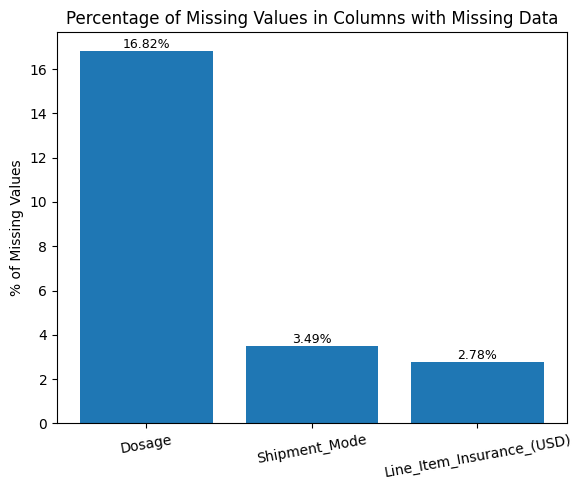

In [19]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum().sort_values(ascending=False)
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Calculate the total number of rows in the DataFrame
total_rows = len(df)
# Calculate the percentage of missing values in each column
percentage_missing_values = (columns_with_missing_values / total_rows) * 100
# Create a bar chart to visualize the percentage of missing values for selected columns
plt.figure(figsize=(6, 5))
bars = plt.bar(percentage_missing_values.index, percentage_missing_values.values)
plt.xticks(rotation=10)
plt.ylabel('% of Missing Values')
plt.title('Percentage of Missing Values in Columns with Missing Data')

# Add percentage information to the labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [21]:
df['ID'].nunique()
#since it contain all unique value it is not necessary for our analusis we can drop it 
df.drop(columns=['ID'],axis=1,inplace=True)

# Exploratory Data Analysis

In [22]:
df.columns

Index(['PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description',
       'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

# Country wise Analysis with Graph

In [23]:
# Top 10 country
df['Country'].value_counts().sort_values(ascending=False).head(10)

Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64

In [20]:
# Top 10 country
top_10_countries = df['Country'].value_counts().sort_values(ascending=False).head(10)
# Create a new DataFrame with the counts and country names
df_top_10 = pd.DataFrame({'Country': top_10_countries.index, 'Count': top_10_countries.values})
# Plot the bar chart using Plotly Express
fig = pe.bar(df_top_10, x='Country', y='Count', title='Top 10 Countries')
fig.show()

In [21]:
Numerical_Features=[col for col in df.columns if df[col].dtype!='O']
Numerical_Features

['ID',
 'Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)']

# Distribution of Numerical Features

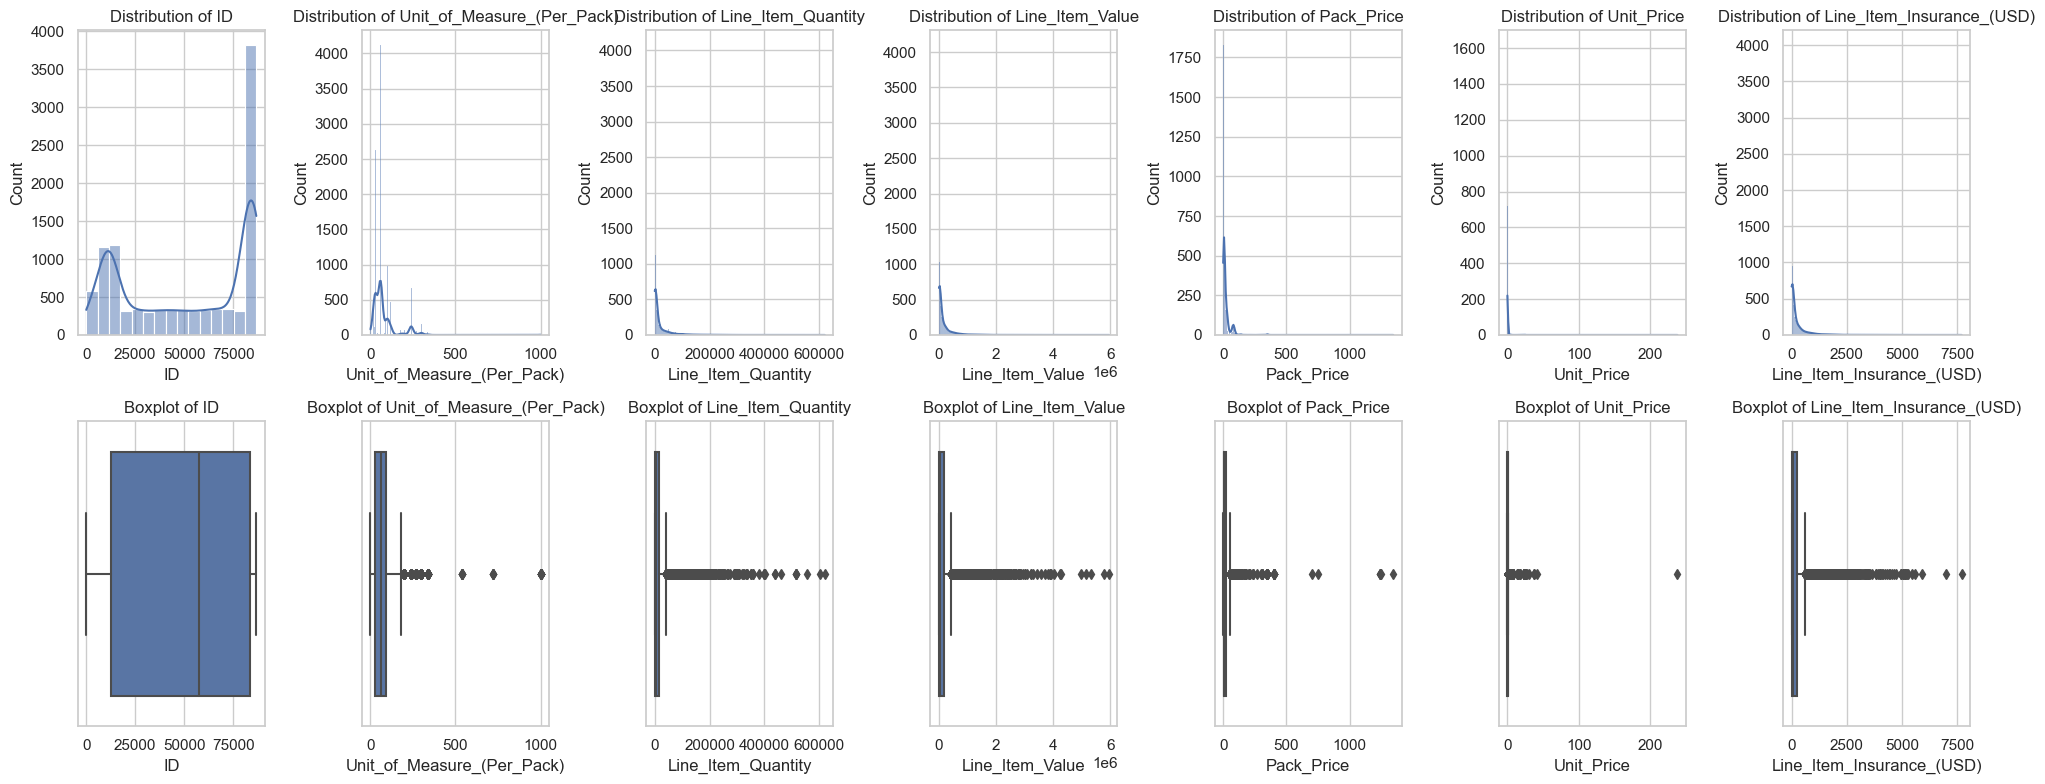

In [22]:
sns.set(style="whitegrid")

# Plot the distribution plots and boxplots side by side
fig, axes = plt.subplots(nrows=2, ncols=len(Numerical_Features), figsize=(20, 8))

for i, feature in enumerate(Numerical_Features):
    # Distribution plot
    sns.histplot(data=df, x=feature, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution of {feature}')

    # Boxplot
    sns.boxplot(data=df, x=feature, ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

We have missing values in Dosag, Shipment_Mode, Line_Item_Insurance_(USD) from these Line_Item_Insurance is a numeric feature and two are categorical .We will handle missign data later

In [23]:
shipping_mode_counts = df['Shipment_Mode'].value_counts()
shipping_mode_counts

Shipment_Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

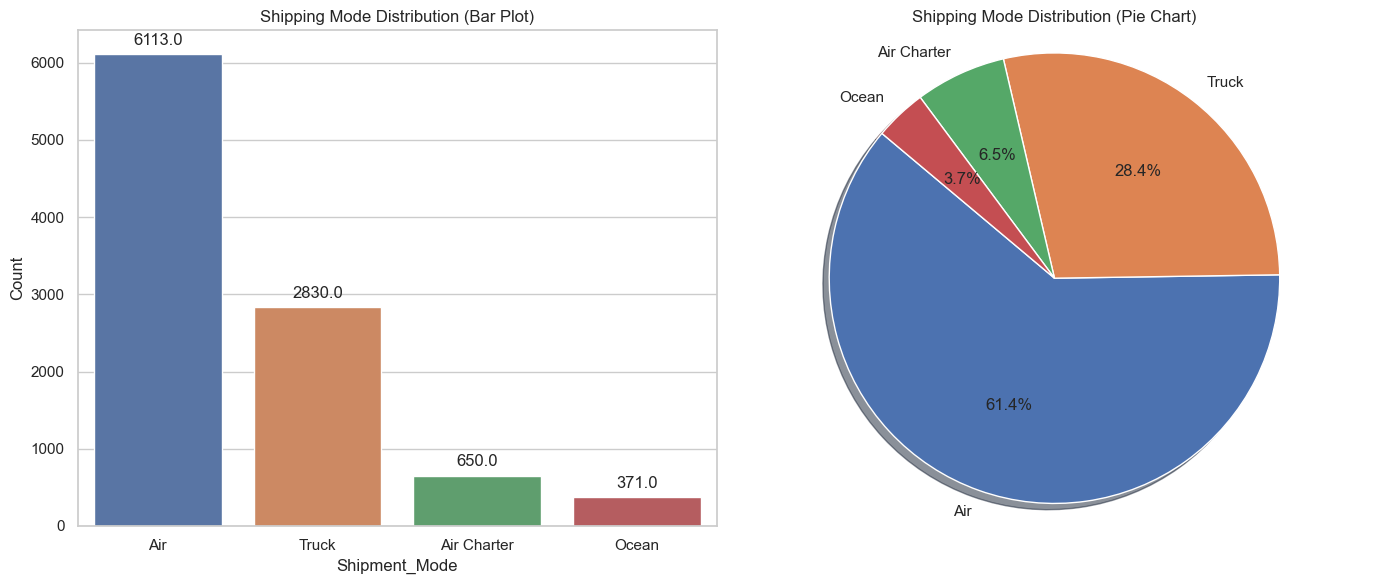

In [24]:

shipping_mode_counts = df['Shipment_Mode'].value_counts()
# Set the style for the plots
sns.set(style="whitegrid")

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the bar chart on the first subplot
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, ax=axes[0])
axes[0].set_title('Shipping Mode Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot the pie chart on the second subplot
axes[1].pie(shipping_mode_counts.values, labels=shipping_mode_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('Shipping Mode Distribution (Pie Chart)')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

Conclusion : From various shipment Mode Air mode has highest % of 61.4% .

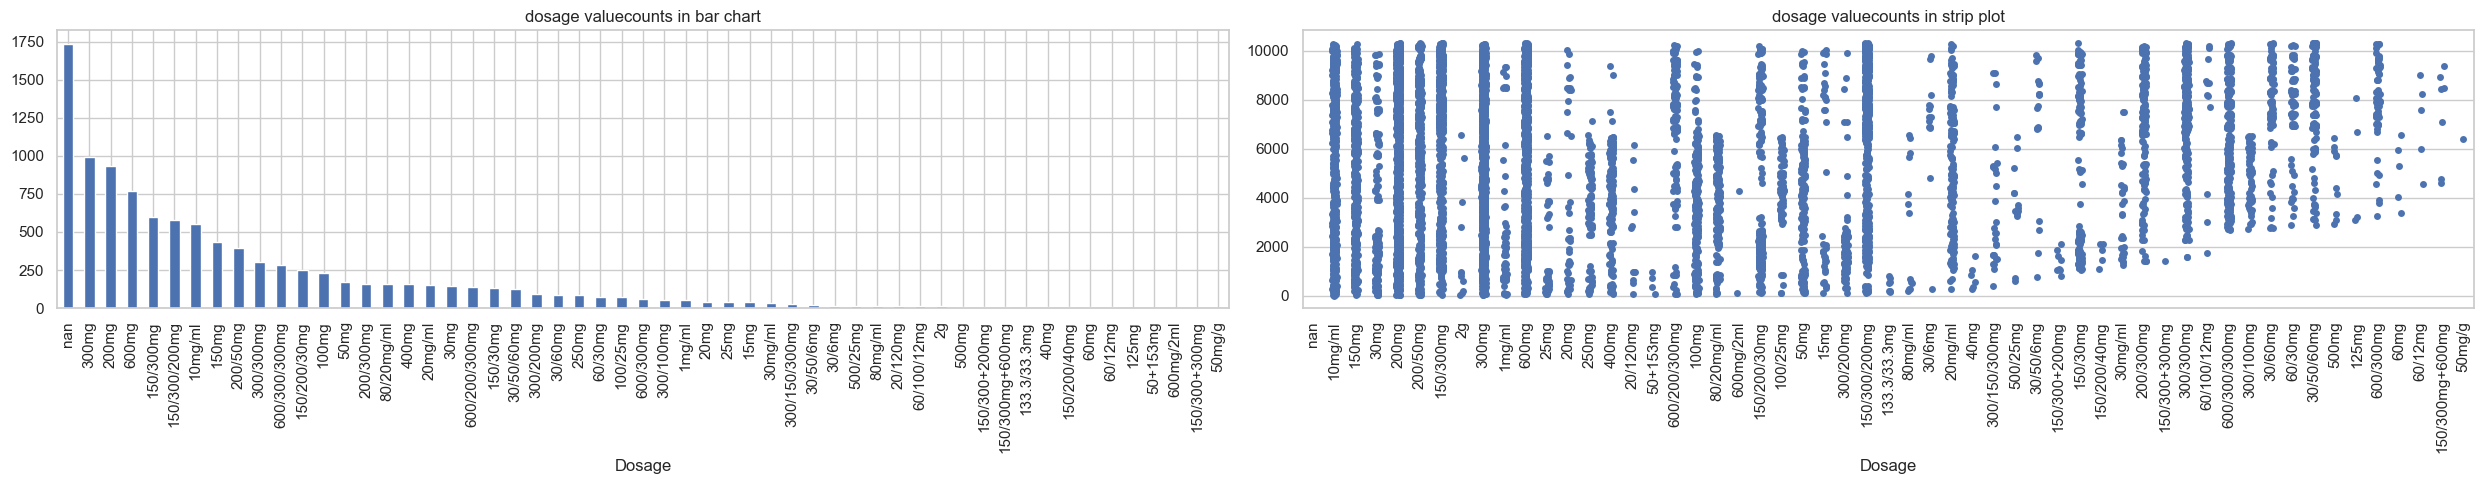

In [25]:
fig=plt.figure(figsize=(25,5))
ax0=fig.add_subplot(121)
df["Dosage"].value_counts(dropna=False).plot.bar()
plt.title("dosage valuecounts in bar chart")

ax1=fig.add_subplot(122)
x=df["Dosage"]
y=df.index
plt.xticks(rotation=90)
sns.stripplot(x=x,y=y)
plt.title("dosage valuecounts in strip plot")
plt.tight_layout()
plt.show()

Since Item Description is not relevant feature to our analysis we can drop it 

In [30]:
df.drop(columns='Item_Description',axis=1,inplace=True)

Displaying unique value count for each Categorical Feature

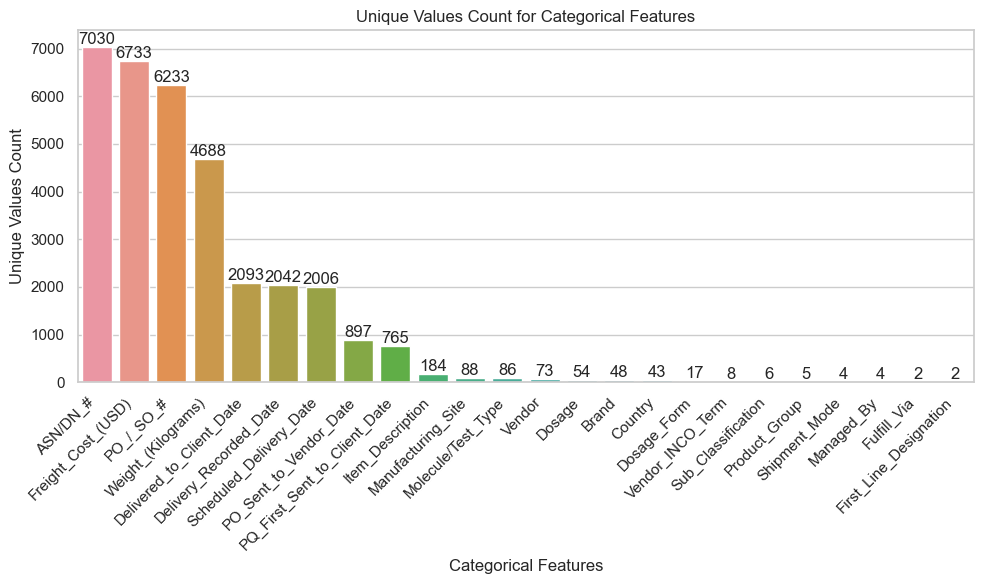

In [26]:
# Get the unique values count for each categorical feature
unique_values_count = df.select_dtypes(include='object').nunique().sort_values(ascending=False)
# Plot the bar chart with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=unique_values_count.index, y=unique_values_count.values)
plt.title('Unique Values Count for Categorical Features')
plt.xlabel('Categorical Features')
plt.ylabel('Unique Values Count')
plt.xticks(rotation=45, ha='right')
# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.tight_layout()
plt.show()


ASN/DN typically stands for "Advance Shipping Notice" or "Delivery Note" in the context of consignment and shipping .it has highesr unique values.

In [27]:
df['ASN/DN_#'].value_counts()

ASN/DN_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

ASN/DN contain numeric data we will split ASN/DN into only two part that is ASN/DN 

In [28]:
def reorder(data):
    data_split=data.split("-")
    data_return=data_split[0]
    return data_return

In [29]:
df['ASN/DN_#']=df['ASN/DN_#'].apply(reorder)

In [30]:
df['ASN/DN_#'].value_counts()

ASN/DN_#
DN     5404
ASN    4920
Name: count, dtype: int64

In [31]:
ASN_DN_value_counts=df['ASN/DN_#'].value_counts()
ASN_DN_value_counts

ASN/DN_#
DN     5404
ASN    4920
Name: count, dtype: int64

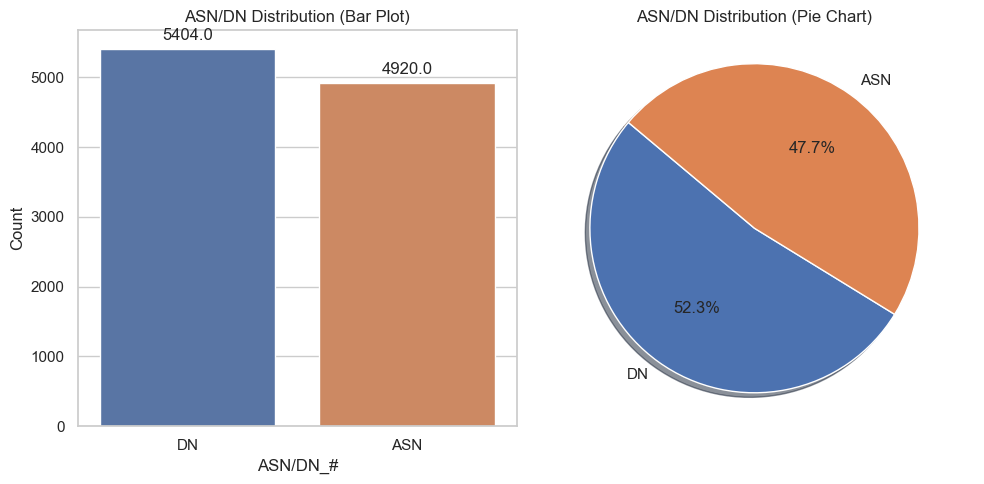

In [34]:
# Get the count of unique values for "ASN/DN" column
ASN_DN_value_counts = df['ASN/DN_#'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the bar chart on the first subplot
sns.barplot(x=ASN_DN_value_counts.index, y=ASN_DN_value_counts.values, ax=axes[0])
axes[0].set_title('ASN/DN Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(ASN_DN_value_counts.values, labels=ASN_DN_value_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('ASN/DN Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()


In [35]:
df['PO_/_SO_#']

0          SCMS-4
1         SCMS-13
2         SCMS-20
3         SCMS-78
4         SCMS-81
           ...   
10319    SO-50020
10320    SO-50102
10321    SO-49600
10322    SO-51680
10323    SO-50022
Name: PO_/_SO_#, Length: 10324, dtype: object

In [36]:
df['PO_/_SO_#']=df['PO_/_SO_#'].apply(reorder)

In [37]:
df['PO_/_SO_#'].value_counts()

PO_/_SO_#
SO      5404
SCMS    4919
DSCM       1
Name: count, dtype: int64

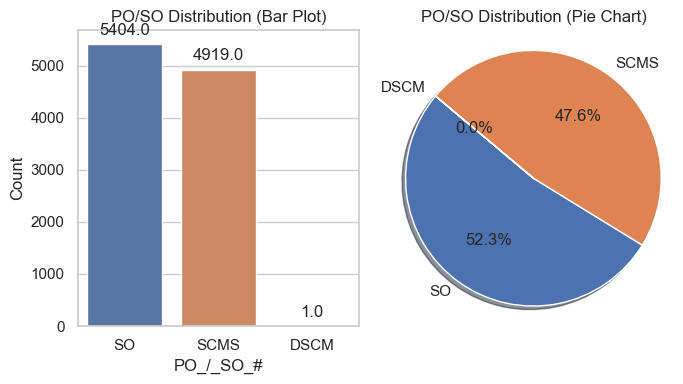

In [38]:
# Get the count of unique values for "ASN/DN" column
PO_SO_value_counts = df['PO_/_SO_#'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,4))

# Plot the bar chart on the first subplot
sns.barplot(x=PO_SO_value_counts.index, y=PO_SO_value_counts.values, ax=axes[0])
axes[0].set_title('PO/SO Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(PO_SO_value_counts.values, labels=PO_SO_value_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('PO/SO Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

In [39]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description',
       'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

# We will analysis shipment management by which Country is max

In [40]:
df['Managed_By'].value_counts()/len(df['Managed_By'])

Managed_By
PMO - US                     0.994285
South Africa Field Office    0.005521
Haiti Field Office           0.000097
Ethiopia Field Office        0.000097
Name: count, dtype: float64

it clearly observed that 99% of shipemnt is managed by US country so this features does not reveal much about data .We can drop it 

In [41]:
df.drop(columns='Managed_By',axis=1,inplace=True)

In [42]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description',
       'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [43]:
df['Fulfill_Via'].value_counts()

Fulfill_Via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

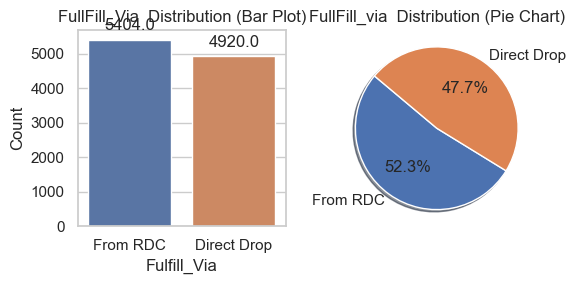

In [46]:
FullFill_via_counts = df['Fulfill_Via'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

# Plot the bar chart on the first subplot
sns.barplot(x=FullFill_via_counts.index, y=FullFill_via_counts.values, ax=axes[0])
axes[0].set_title('FullFill_Via  Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(FullFill_via_counts.values, labels=FullFill_via_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('FullFill_via  Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

In the context of consignment and logistics, "Fulfill Via" refers to the method or channel used to fulfill or deliver a shipment to its destination. The "Fulfill Via" column typically contains categorical values that represent the fulfillment options available for the consignments. The two categories mentioned, "RDC" and "Direct Drop," signify different fulfillment methods:

* RDC :When the "Fulfill Via" value is "RDC," it means that the shipment will be sent to a regional distribution center, and from there, it will be further distributed to local retail stores or outlets for final delivery to the end customers. RDCs help consolidate shipments, reduce transportation costs, and improve inventory management efficiency.

* Direct Drop: When the "Fulfill Via" value is "Direct Drop," it means that the consignment will be sent directly from the source (e.g., manufacturer or supplier) to the destination (e.g., customer's location or retail store) without any intermediate handling or storage.

Vendor_INCO_Term :These terms are used to define the rights and responsibilities of buyers and sellers involved in international transactions, particularly regarding the delivery of goods.
 Each INCO term defines various aspects of the shipment and delivery process, including:
 1:Responsibility for Transporatation
 2:Risk of Loss or Damage
 3:Export and Import Farmalities 
 4:Delivery Point 

 it has category :

 * EXW :The seller makes the goods available at their premises, and the buyer is responsible for all transportation and risks from the seller's location to the final destination. The seller's obligation is to make the goods available for pickup by the buyer at their place of business.

 * DDP (Delivered Duty Paid): The seller is responsible for delivering the goods to the buyer at the destination, cleared for import, and bearing all risks and costs, including import duties and taxes.

 * FCA (Free Carrier): The seller delivers the goods, cleared for export, to the carrier nominated by the buyer at the agreed-upon place. The risk transfers to the buyer when the goods are handed over to the carrier.

 * CIP (Carriage and Insurance Paid To): The seller delivers the goods to the carrier or another person nominated by the seller at an agreed-upon place. The seller is responsible for the cost of carriage to the named destination and provides insurance against the buyer's risk of loss or damage during transit.

 * DDU (Delivered Duty Unpaid): The seller delivers the goods to the buyer at the agreed-upon destination, but the buyer is responsible for import clearance and paying any applicable import duties and taxes.

 * DAP (Delivered at Place):The seller delivers the goods to the buyer at the agreed-upon place of destination. The seller is responsible for arranging and paying for transportation, but the buyer handles import clearance and duties.

 * CIF (Cost, Insurance, and Freight): The seller is responsible for the cost, insurance, and freight to deliver the goods to the specified port of destination. The risk transfers to the buyer when the goods are on board the vessel.

In [47]:
df['Vendor_INCO_Term'].value_counts()/len(df['Vendor_INCO_Term'])

Vendor_INCO_Term
N/A - From RDC    0.523441
EXW               0.269082
DDP               0.139771
FCA               0.038454
CIP               0.026637
DDU               0.001453
DAP               0.000872
CIF               0.000291
Name: count, dtype: float64

In [48]:
# it is clear the only 2 category are visible and they are dominating we can group them and make it as other s
df['Vendor_INCO_Term']=df['Vendor_INCO_Term'].replace(["CIP","DDU","DAP","CIF"],"others")

In [49]:
df['Vendor_INCO_Term'].value_counts()

Vendor_INCO_Term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
others             302
Name: count, dtype: int64

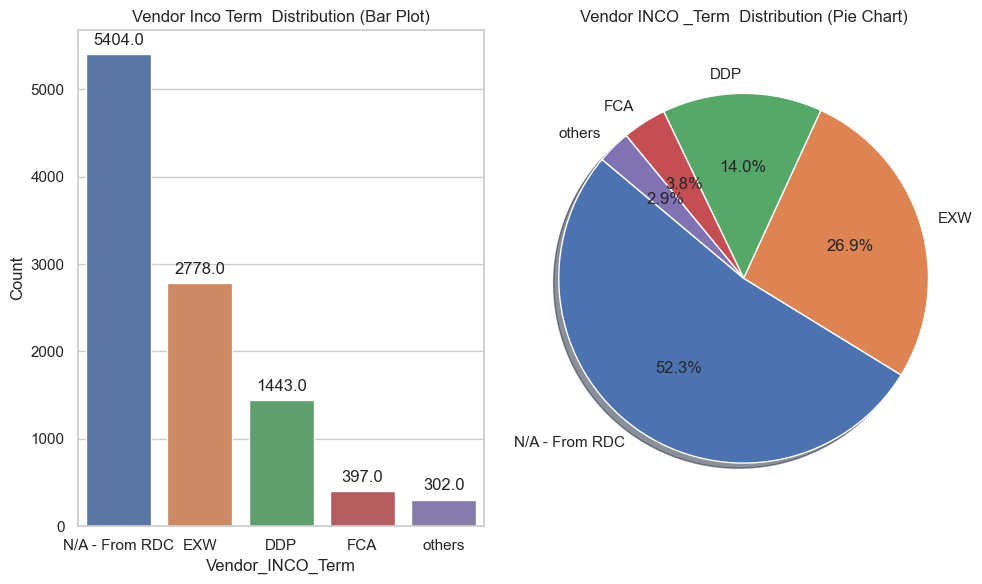

In [50]:
Vendor_INCO_Term_counts = df['Vendor_INCO_Term'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# Plot the bar chart on the first subplot
sns.barplot(x=Vendor_INCO_Term_counts.index, y=Vendor_INCO_Term_counts.values, ax=axes[0])
axes[0].set_title('Vendor Inco Term  Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(Vendor_INCO_Term_counts.values, labels=Vendor_INCO_Term_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('Vendor INCO _Term  Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

In [51]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description',
       'Molecule/Test_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

# PQ_First_Sent_to_Client_Date :
The "PQ First Sent to Client Date" is a significant timestamp in the consignment process as it marks the initial step of providing relevant information, documentation, or samples to the client for their evaluation. This date is crucial for tracking the timeline of the consignment process and ensuring that all necessary documents and details are provided to the client in a timely manner.

In [52]:
df['PQ_First_Sent_to_Client_Date'].value_counts()

PQ_First_Sent_to_Client_Date
Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
                     ... 
7/29/10                 1
10/3/11                 1
12/17/13                1
2/5/15                  1
8/29/13                 1
Name: count, Length: 765, dtype: int64

In [53]:
df['PQ_First_Sent_to_Client_Date'].nunique()

765

In [54]:
df['PQ_First_Sent_to_Client_Date'].max()

'Pre-PQ Process'

In [55]:
df['PQ_First_Sent_to_Client_Date'].min()

'1/10/12'

Some possible considerations for choosing a fixed date value in consignment pricing prediction domain are:

* Earliest Date Available: One approach could be to use the earliest date available in the dataset as the fixed date for "Pre-PQ Process" entries. This ensures that the placeholder date falls within the range of known dates and does not bias the analysis toward a specific time period.

* Domain-Specific Default Date: If the consignment pricing prediction domain has a well-defined default date for representing missing or unknown dates, that value could be used as the fixed date. For example, it could be the start of the fiscal year, the beginning of the project, or any other relevant date.

* Mean or Median Date: Another option is to calculate the mean or median date from the known dates in the dataset and use that value as the fixed date for "Pre-PQ Process" entries. This approach ensures that the placeholder date is representative of the distribution of known dates.

* Historical Baseline: If there is historical data available, a date from a baseline year or period could be chosen as the fixed date. This allows for consistent comparison with historical data.

* Domain Expert Input: Input from domain experts in the consignment pricing prediction domain can be valuable in determining an appropriate fixed date value. Domain experts may have insights into the typical duration of the PQ process or established practices for handling missing dates.

Since we have so many records whose dates are not mentioned in PQ_First_Sent_to_Client_Date we have so many option we can adopt Domain knowledge and one option to fill by using earlist date 

In [56]:
#df_copy=df.copy()
df['PQ_First_Sent_to_Client_Date']=pd.to_datetime(df['PQ_First_Sent_to_Client_Date'],errors='coerce',format='%m/%d/%y')

In [57]:
df['PQ_First_Sent_to_Client_Date'].min()

Timestamp('2009-01-04 00:00:00')

In [58]:
df['PQ_First_Sent_to_Client_Date'].fillna(df['PQ_First_Sent_to_Client_Date'].min(),inplace=True)

In [59]:
df['PQ_First_Sent_to_Client_Date']=df['PQ_First_Sent_to_Client_Date'].dt.strftime('%d-%b-%y')

Since rest of dates are in format of %d-%b-%y we have to convert PQ_First_Sent_to_Client_Date also in same format

In [60]:
#df['PQ_First_Sent_to_Client_Date']=df['PQ_First_Sent_to_Client_Date'].dt.strftime('%d-%b-%y')

PO_Sent_to_Vendor_Date

In [61]:
df['PO_Sent_to_Vendor_Date'].value_counts()/len(df['PO_Sent_to_Vendor_Date'])

PO_Sent_to_Vendor_Date
N/A - From RDC       0.523441
Date Not Captured    0.031771
8/27/14              0.007749
3/19/10              0.007555
8/29/14              0.007361
                       ...   
5/18/15              0.000097
2/10/14              0.000097
10/16/13             0.000097
12/9/11              0.000097
8/29/12              0.000097
Name: count, Length: 897, dtype: float64

most of data is been represented by RDC itself we  can drop PO_Sent_to_Vendor_Date 

In [62]:
df.drop(columns='PO_Sent_to_Vendor_Date',axis=1,inplace=True)

In [63]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

Scheduled_Delivery_Date:

In [64]:
df['Scheduled_Delivery_Date']

0         2-Jun-06
1        14-Nov-06
2        27-Aug-06
3         1-Sep-06
4        11-Aug-06
           ...    
10319    31-Jul-15
10320    31-Jul-15
10321    31-Aug-15
10322     9-Sep-15
10323    31-Aug-15
Name: Scheduled_Delivery_Date, Length: 10324, dtype: object

In [65]:
def transform_date(data):
    data=data.replace("-","-")
    data=pd.to_datetime(data, format="%d-%b-%y")
    return data

In [66]:
df['Scheduled_Delivery_Date']=df['Scheduled_Delivery_Date'].apply(transform_date)

In [67]:
df['Scheduled_Delivery_Date'].dtype

dtype('<M8[ns]')

In [68]:
df['Delivered_to_Client_Date'].value_counts()

Delivered_to_Client_Date
29-Aug-14    74
27-Aug-14    66
14-Feb-12    60
28-Jun-10    60
16-Apr-13    59
             ..
1-Nov-14      1
31-Mar-14     1
28-Sep-12     1
8-Sep-15      1
16-Apr-15     1
Name: count, Length: 2093, dtype: int64

In [69]:
df['Delivered_to_Client_Date']=df['Delivered_to_Client_Date'].apply(transform_date)

In [70]:
df['Delivered_to_Client_Date'].value_counts()

Delivered_to_Client_Date
2014-08-29    74
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
              ..
2014-11-01     1
2014-03-31     1
2012-09-28     1
2015-09-08     1
2015-04-16     1
Name: count, Length: 2093, dtype: int64

In [71]:
df['Delivered_to_Client_Date'].dt.year

0        2006
1        2006
2        2006
3        2006
4        2006
         ... 
10319    2015
10320    2015
10321    2015
10322    2015
10323    2015
Name: Delivered_to_Client_Date, Length: 10324, dtype: int32

In [72]:
df['Delivery_Recorded_Date']=df['Delivery_Recorded_Date'].apply(transform_date)

In [73]:
df['Delivery_Recorded_Date'].value_counts()

Delivery_Recorded_Date
2014-08-29    67
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
              ..
2011-04-16     1
2012-08-10     1
2010-08-31     1
2011-03-23     1
2015-05-08     1
Name: count, Length: 2042, dtype: int64

# Year-wise Delivery Trends in Consignment

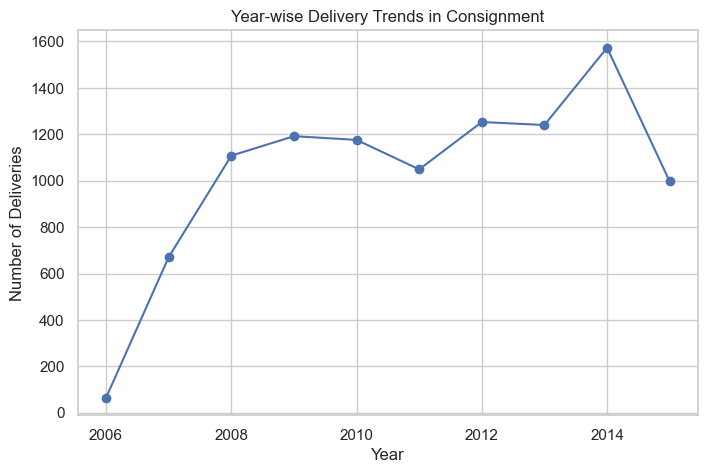

In [76]:
# Extract the year from the datetime values
df['Delivered_to_Client_Date'].dt.year

# Group by year and count the number of deliveries in each year
yearly_delivery_counts = df['Delivered_to_Client_Date'].dt.year.value_counts().sort_index()

# Plot the year-wise delivery trends using a time series plot
plt.figure(figsize=(8, 5))
plt.plot(yearly_delivery_counts.index, yearly_delivery_counts.values, marker='o')
plt.title('Year-wise Delivery Trends in Consignment')
plt.xlabel('Year')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()

Conclusion :From above timesearie it shows in year 2014 most of shipment has done 

# Year-wise Delivery Trends by Shipment Mode

<Figure size 1000x600 with 0 Axes>

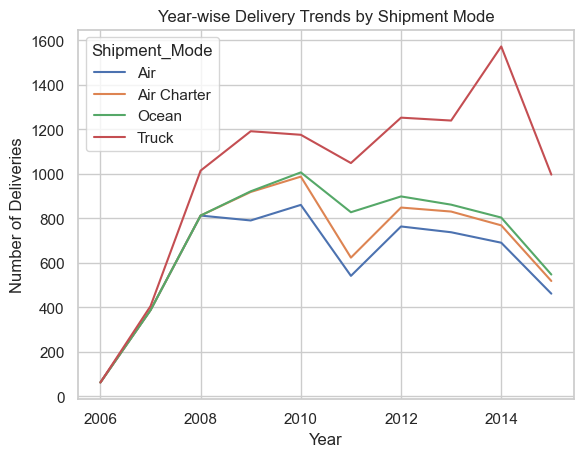

In [78]:

# Group by year and transportation mode, and count the number of deliveries in each group
yearly_mode_counts = df.groupby([df['Delivered_to_Client_Date'].dt.year, 'Shipment_Mode'])['Shipment_Mode'].count()

# Convert the groupby result to a DataFrame
yearly_mode_counts = yearly_mode_counts.unstack(level='Shipment_Mode')

# Plot the year-wise delivery trends for each transportation mode using a stacked area plot
plt.figure(figsize=(10, 6))
yearly_mode_counts.plot(kind='line', stacked=True)
plt.title('Year-wise Delivery Trends by Shipment Mode')
plt.xlabel('Year')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()


# Year-wise Delivery Trends by Product Group

<Figure size 800x500 with 0 Axes>

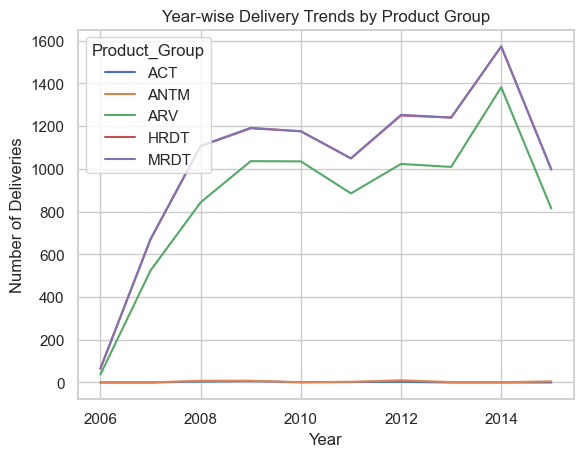

In [79]:
# Group by year and transportation mode, and count the number of deliveries in each group
yearly_mode_counts = df.groupby([df['Delivered_to_Client_Date'].dt.year, 'Product_Group'])['Product_Group'].count()

# Convert the groupby result to a DataFrame
yearly_mode_counts = yearly_mode_counts.unstack(level='Product_Group')

# Plot the year-wise delivery trends for each transportation mode using a stacked area plot
plt.figure(figsize=(8,5))
yearly_mode_counts.plot(kind='line', stacked=True)
plt.title('Year-wise Delivery Trends by Product Group')
plt.xlabel('Year')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()


Conclusion :

From year by year analysis of deliveries most of the Product Group that delivered are MRDT and ARV 

MRDT : MALARIA RAPID DIAGNOSTIC TEST 

ARV: : ARV" stand for "Antiretroviral Drugs," which could be a category of pharmaceuticals used to treat HIV.

Most of the product that has been shipped are MRDT and ARV

# Year-wise Delivery Trends by Sub Category of Products

<Figure size 800x500 with 0 Axes>

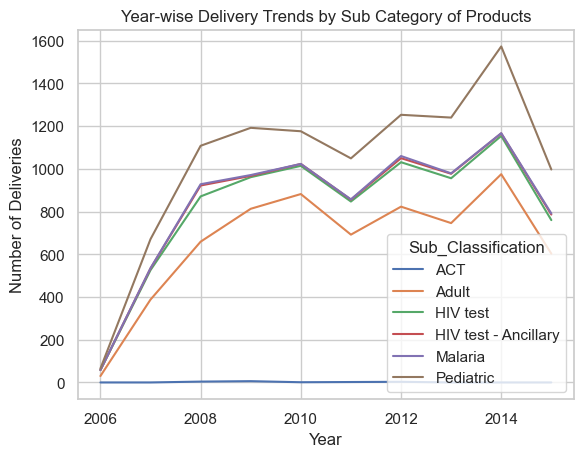

In [89]:
# Group by year and transportation mode, and count the number of deliveries in each group
yearly_mode_counts = df.groupby([df['Delivered_to_Client_Date'].dt.year, 'Sub_Classification'])['Sub_Classification'].count()

# Convert the groupby result to a DataFrame
yearly_mode_counts = yearly_mode_counts.unstack(level='Sub_Classification')

# Plot the year-wise delivery trends for each transportation mode using a stacked area plot
plt.figure(figsize=(8,5))
yearly_mode_counts.plot(kind='line', stacked=True)
plt.title('Year-wise Delivery Trends by Sub Category of Products')
plt.xlabel('Year')
plt.ylabel('Number of Deliveries')
plt.grid(True)
plt.show()


In [90]:
df['Product_Group'].value_counts()

KeyError: 'Product_Group'

In [87]:
Product_Group_Counts = df['Product_Group'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# Plot the bar chart on the first subplot
sns.barplot(x=Product_Group_Counts.index, y=Product_Group_Counts.values, ax=axes[0])
axes[0].set_title('Product Group  Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(Product_Group_Counts.values, labels=Product_Group_Counts.index, autopct='%1.1f%%', startangle=100, shadow=True)
axes[1].set_title('Product Group  Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

KeyError: 'Product_Group'

Among all product group only 1 category shows more no variations .we can drop this column 

In [83]:
df.drop(columns='Product_Group',axis=1,inplace=True)

In [91]:
df['Sub_Classification'].value_counts()

Sub_Classification
Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

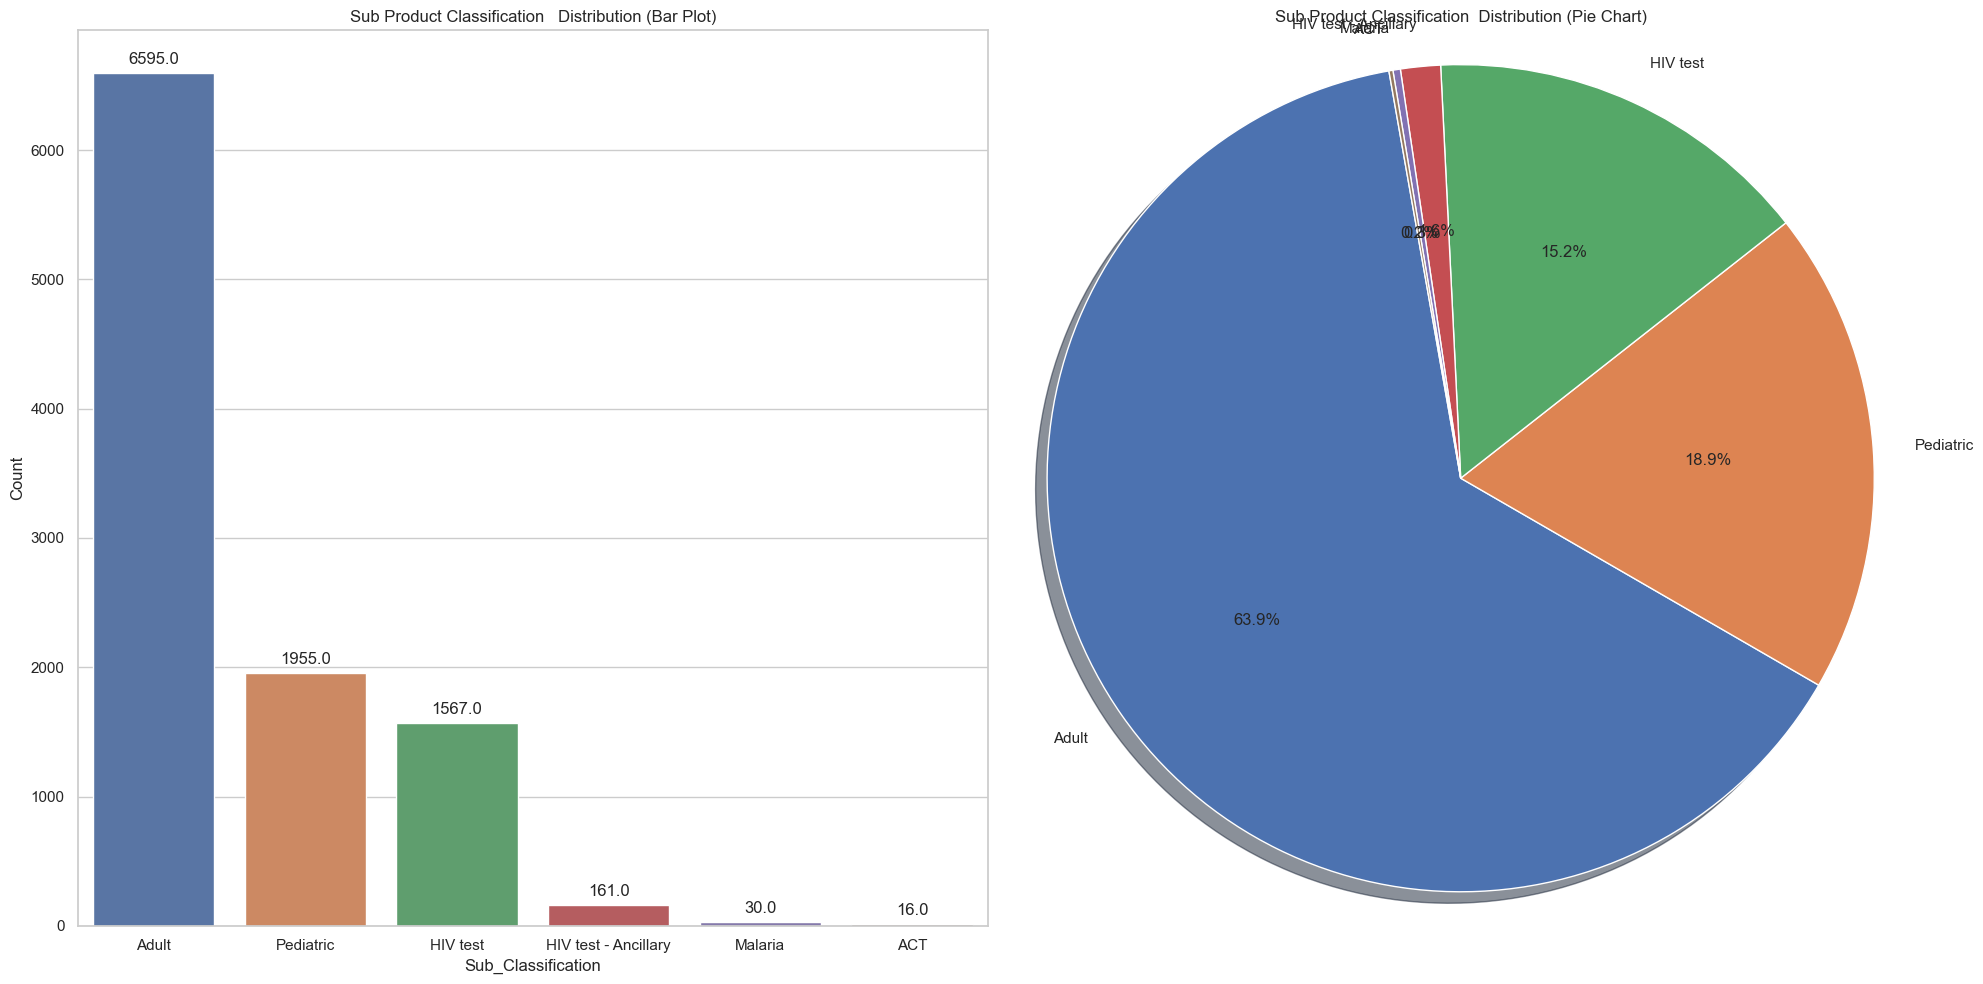

In [92]:
Sub_Product_Group_Counts = df['Sub_Classification'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# Plot the bar chart on the first subplot
sns.barplot(x=Sub_Product_Group_Counts.index, y=Sub_Product_Group_Counts.values, ax=axes[0])
axes[0].set_title('Sub Product Classification   Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(Sub_Product_Group_Counts.values, labels=Sub_Product_Group_Counts.index, autopct='%1.1f%%', startangle=100, shadow=True)
axes[1].set_title('Sub Product Classification  Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

In [93]:
df['Vendor'].value_counts()

Vendor
SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: count, Length: 73, dtype: int64

Text(0.5, 1.0, 'bar chart for vendor column')

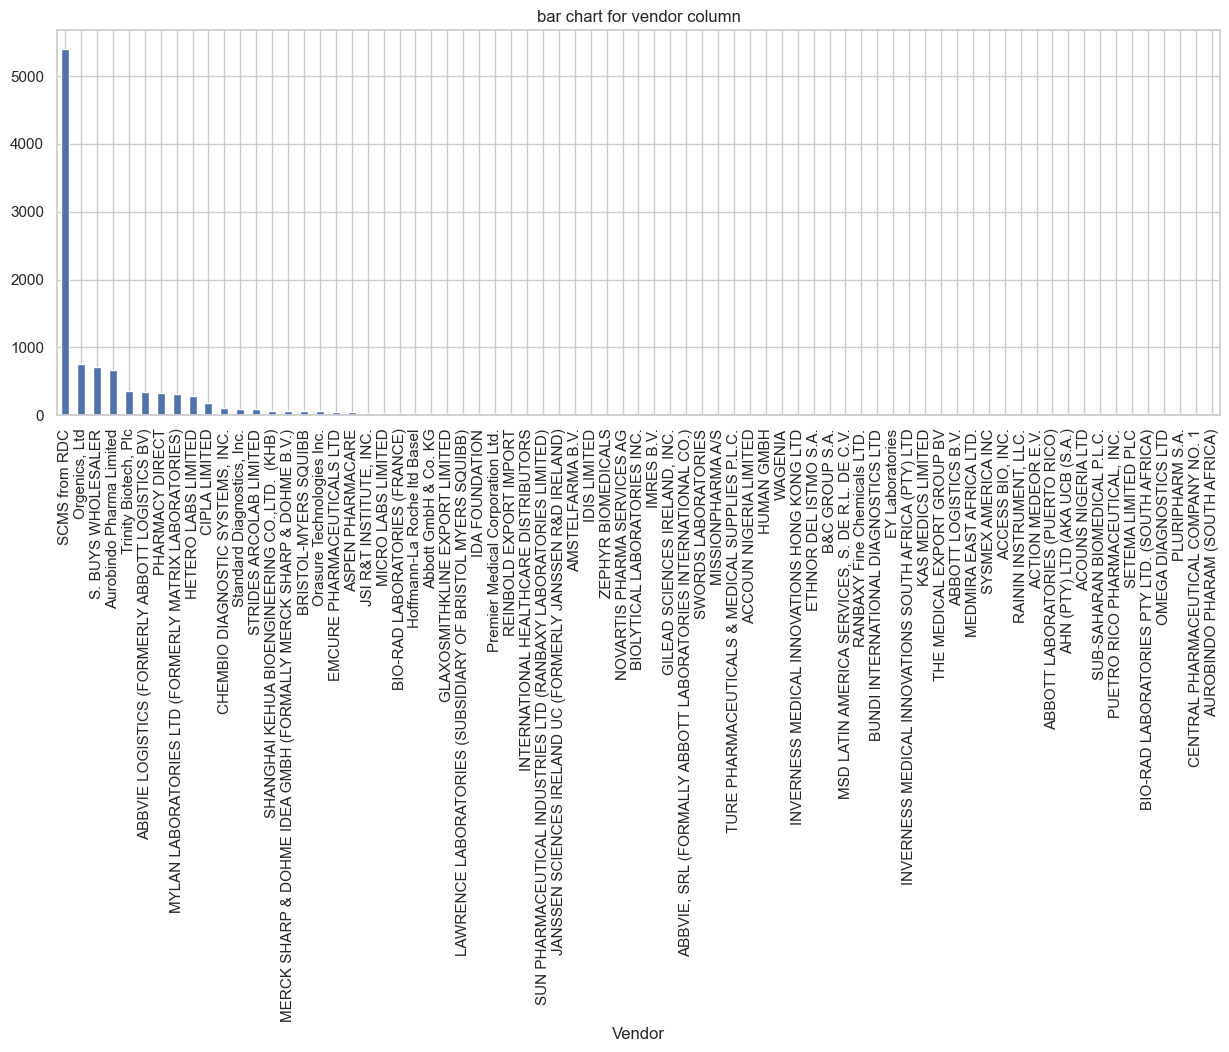

In [94]:
plt.figure(figsize=(15,5))
df["Vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [95]:
df['Vendor'].value_counts()/len(df['Vendor'])

Vendor
SCMS from RDC                                   0.523441
Orgenics, Ltd                                   0.073034
S. BUYS WHOLESALER                              0.069256
Aurobindo Pharma Limited                        0.064704
Trinity Biotech, Plc                            0.034483
                                                  ...   
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)    0.000097
OMEGA DIAGNOSTICS LTD                           0.000097
PLURIPHARM S.A.                                 0.000097
CENTRAL PHARMACEUTICAL COMPANY NO. 1            0.000097
AUROBINDO PHARAM (SOUTH AFRICA)                 0.000097
Name: count, Length: 73, dtype: float64

Conclusion:only 1 vendor represents has majority count no variations in vendor category since it is biased we can drop this column

In [96]:
df.drop(columns='Vendor',axis=1,inplace=True)

In [97]:
df['Molecule/Test_Type'].value_counts()

Molecule/Test_Type
Efavirenz                           1125
Nevirapine                           877
Lamivudine/Nevirapine/Zidovudine     707
Lamivudine/Zidovudine                689
Lopinavir/Ritonavir                  633
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

Conclusion : Molecule/Test_type data represents same information as mentioned in Sub_Classification features because both represents Test so we can drop Molecule/Test_Type column

In [98]:
df.drop(columns='Molecule/Test_Type',axis=1,inplace=True)

In [99]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Sub_Classification', 'Item_Description',
       'Brand', 'Dosage', 'Dosage_Form', 'Unit_of_Measure_(Per_Pack)',
       'Line_Item_Quantity', 'Line_Item_Value', 'Pack_Price', 'Unit_Price',
       'Manufacturing_Site', 'First_Line_Designation', 'Weight_(Kilograms)',
       'Freight_Cost_(USD)', 'Line_Item_Insurance_(USD)'],
      dtype='object')

In [100]:
df['Brand'].value_counts()

Brand
Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

In [101]:
df['Brand'].value_counts()/len(df['Brand'])

Brand
Generic            0.705637
Determine          0.077392
Uni-Gold           0.036129
Aluvia             0.024215
Kaletra            0.015982
Norvir             0.013173
Stat-Pak           0.011139
Bioline            0.010945
Truvada            0.009105
Videx              0.008136
Colloidal Gold     0.006780
Stocrin/Sustiva    0.006683
OraQuick           0.005812
Invirase           0.005134
Viread             0.005037
Zerit              0.004456
Isentress          0.004262
Epivir             0.004068
Prezista           0.004068
Videx EC           0.003971
Retrovir           0.003971
Ziagen             0.003584
Crixivan           0.003487
Capillus           0.003390
Intelence          0.003100
Genie              0.002906
Viramune           0.002712
Clearview          0.001840
Trizivir           0.001744
Reyataz            0.001744
Atripla            0.001550
First Response     0.001453
Coartem            0.001162
Viracept           0.001065
DoubleCheck        0.000484
INSTi         

Conclusion: 

As we can see 70% of brand belongs to Generic Brand means dataset higly biased towards Generic Brand and does not reveal much variations we can drop it 

In [102]:
df.drop(columns='Brand',axis=1,inplace=True)

In [103]:
df[['Dosage','Dosage_Form']]

Dosage                        Dosage_Form
0                NaN                           Test kit
1            10mg/ml                    Oral suspension
2                NaN                           Test kit
3              150mg                             Tablet
4               30mg                            Capsule
...              ...                                ...
10319     30/50/60mg  Chewable/dispersible tablet - FDC
10320      150/300mg                       Tablet - FDC
10321  600/300/300mg                       Tablet - FDC
10322      150/300mg                       Tablet - FDC
10323        30/60mg  Chewable/dispersible tablet - FDC

[10324 rows x 2 columns]

Conclusion :

From above information it show Dosage and Dosage_Form show one information i.e about dose dosage _form is just description about what type of dose it is either oral,chewable or any test kit .same information as already been passed in Dosage so we can drop Dosage_Form column

In [104]:
df.drop(columns='Dosage_Form',axis=1,inplace=True)

In [105]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Sub_Classification', 'Item_Description',
       'Dosage', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [106]:
df['Line_Item_Insurance_(USD)']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
10319     705.79
10320     161.71
10321    5284.04
10322     134.03
10323      85.82
Name: Line_Item_Insurance_(USD), Length: 10324, dtype: float64

In [107]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Sub_Classification', 'Item_Description',
       'Dosage', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [108]:
df['Manufacturing_Site'].value_counts()

Manufacturing_Site
Aurobindo Unit III, India              3172
Mylan (formerly Matrix) Nashik         1415
Hetero Unit III Hyderabad IN            869
Cipla, Goa, India                       665
Strides, Bangalore, India.              540
                                       ... 
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
OMEGA Diagnostics, UK                     1
ABBSP                                     1
Medochemie Factory A, CY                  1
Name: count, Length: 88, dtype: int64

In [109]:
# Since we have long list of Manufacturing_Site we will show just top 50 manufacturing Site
df['Manufacturing_Site'].value_counts().head(50) 

Manufacturing_Site
Aurobindo Unit III, India                                                   3172
Mylan (formerly Matrix) Nashik                                              1415
Hetero Unit III Hyderabad IN                                                 869
Cipla, Goa, India                                                            665
Strides, Bangalore, India.                                                   540
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    219
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                141
Chembio D

# Top 10 Manufacturing_Site 

In [110]:
# Top 10 country
top_10_Manufacturing_site = df['Manufacturing_Site'].value_counts().sort_values(ascending=False).head(10)
# Create a new DataFrame with the counts and country names
df_top_10 = pd.DataFrame({'Manufacturing_Sites': top_10_Manufacturing_site.index, 'Count': top_10_Manufacturing_site.values})
# Plot the bar chart using Plotly Express
fig = pe.bar(df_top_10, x='Manufacturing_Sites', y='Count', title='Top 10 manufacturing Sites')
fig.show()

Conclusion : 
Among top 10 manufacturing sites we have 5 manufacturing sites who are top 5 from India

The impact of manufacturing sites on consignment shipping pricing prediction analysis can be significant, as manufacturing sites are closely related to various factors that influence shipping costs and pricing decisions. Here are some ways in which manufacturing sites can impact or influence consignment shipping pricing prediction analysis:

We will keep only top 50 manufacturing sites and rest we will include into OtherManufacturingSites category

In [111]:
manufacturer=df['Manufacturing_Site'].value_counts().to_dict()

In [112]:
other_manufacturing_site=[]
for key,value in manufacturer.items():
    if value<=50:
        other_manufacturing_site.append(key)
other_manufacturing_site

['Cipla, Kurkumbh, India',
 'Roche Basel',
 'Hetero, Jadcherla, unit 5, IN',
 'Pacific Biotech, Thailand',
 'Cipla, Patalganga, India',
 'Ranbaxy, Paonta Shahib, India',
 'Bio-Rad Laboratories',
 'GSK Ware (UK)',
 'ABBVIE GmbH & Co.KG Wiesbaden',
 'Gilead(Nycomed) Oranienburg DE',
 'Bristol-Myers Squibb Anagni IT',
 'ABBVIE (Abbott) France',
 'Mylan,  H-12 & H-13, India',
 "MSD Midrand, J'burg, SA",
 'GSK Cape Town Factory (South Africa)',
 'Roche Madrid',
 'Cipla Ltd A-42 MIDC Mahar. IN',
 'BMS Evansville, US',
 'GSK Aranda',
 'Premier Med. Corp Ltd. India',
 'Boehringer Ing., Koropi, GR',
 'Not Applicable',
 'Orasure Technologies, Inc USA',
 'MSD Elkton USA',
 'BI, Ingelheim, Germany',
 'Ranbaxy per Shasun Pharma',
 'Inverness USA',
 'MSD Manati, Puerto Rico, (USA)',
 'Micro Labs, Hosur, India',
 'Macleods Daman Plant INDIA',
 'Novartis Pharma Suffern, USA',
 "ABBVIE (Abbott) St. P'burg USA",
 'Boehringer Ingelheim Roxane US',
 'GSK Crawley',
 'Orasure Technologies, Inc',
 'Novartis 

In [113]:
df['Manufacturing_Site']=df['Manufacturing_Site'].replace(other_manufacturing_site,'other_manufacturing_site')

In [114]:
df['Manufacturing_Site'].unique()

array(['other_manufacturing_site', 'Aurobindo Unit III, India',
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'Cipla, Goa, India', 'BMS Meymac, France',
       'Chembio Diagnostics Sys. Inc.', 'Inverness Japan',
       'Standard Diagnostics, Korea', 'GSK Mississauga (Canada)',
       'Mylan (formerly Matrix) Nashik', 'MSD, Haarlem, NL',
       'Aspen-OSD, Port Elizabeth, SA', 'ABBVIE (Abbott) Logis. UK',
       'Hetero Unit III Hyderabad IN', 'Strides, Bangalore, India.',
       'KHB Test Kit Facility, Shanghai China',
       'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India',
       'Alere Medical Co., Ltd.', 'Janssen-Cilag, Latina, IT',
       'Aurobindo Unit VII, IN', 'Micro labs, Verna, Goa, India'],
      dtype=object)

In [115]:
df['First_Line_Designation'].value_counts()

First_Line_Designation
Yes    7030
No     3294
Name: count, dtype: int64

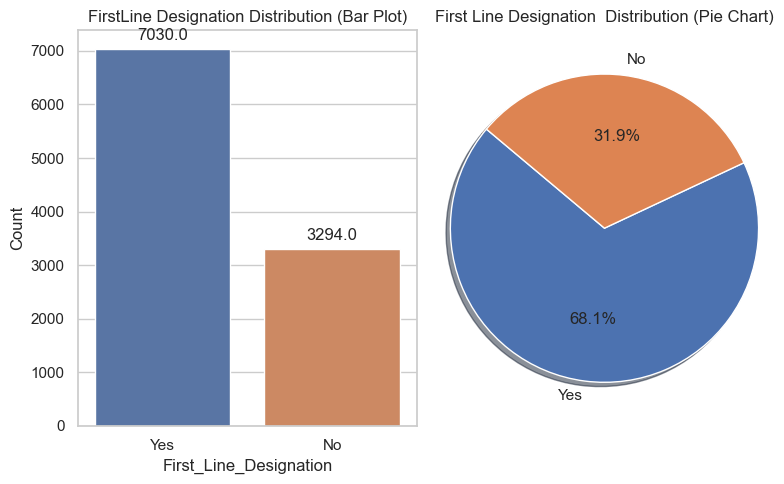

In [116]:
First_Line_Designation_count = df['First_Line_Designation'].value_counts()

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

# Plot the bar chart on the first subplot
sns.barplot(x=First_Line_Designation_count.index, y=First_Line_Designation_count.values, ax=axes[0])
axes[0].set_title('FirstLine Designation Distribution (Bar Plot)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Plot the pie chart on the second subplot
axes[1].pie(First_Line_Designation_count.values, labels=First_Line_Designation_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('First Line Designation  Distribution (Pie Chart)')
axes[1].axis('equal')
# Adjust the layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

# Handling Weight data 

Since weight of product is not directly mentioned it is mnentioned in terms of some description where this weight is given we have to extract it from that enclosure and keep it as weight

In [117]:
df['Weight_(Kilograms)']

0                                13
1                               358
2                               171
3                              1855
4                              7590
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight_(Kilograms), Length: 10324, dtype: object

In [118]:
df['Weight_(Kilograms)'].value_counts()

Weight_(Kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: count, Length: 4688, dtype: int64

In [119]:
df['Weight_(Kilograms)'].unique()

array(['13', '358', '171', ..., '1547', 'See DN-4282 (ID#:83919)', '1392'],
      dtype=object)

In [120]:
len(df[df['Weight_(Kilograms)'].str.startswith('See')])

2445

In [121]:
df['Weight_(Kilograms)'].value_counts()/len(df['Weight_(Kilograms)'])

Weight_(Kilograms)
Weight Captured Separately    0.145971
2                             0.002809
6                             0.002518
1                             0.002228
60                            0.001937
                                ...   
1727                          0.000097
4038                          0.000097
1930                          0.000097
4382                          0.000097
1392                          0.000097
Name: count, Length: 4688, dtype: float64

In [122]:
len(df[df['Weight_(Kilograms)']=='Weight Captured Separately'])

1507

In [123]:
import pandas as pd
import re
# Function to extract weight from complex values
def extract_weight(value):
    match = re.search(r'\d+\.*\d*', value)  # Extract numbers (including decimals)
    if match:
        return float(match.group())
    else:
        return value
# Apply the extraction function to the 'Weight_(Kilograms)' column
df['Weight_(Kilograms)']= df['Weight_(Kilograms)'].apply(extract_weight)

In [124]:
df['Weight_(Kilograms)'].value_counts()

Weight_(Kilograms)
Weight Captured Separately    1507
2.0                             29
6.0                             26
1.0                             23
5.0                             20
                              ... 
2148.0                           1
12945.0                          1
695.0                            1
32776.0                          1
1392.0                           1
Name: count, Length: 4125, dtype: int64

In [125]:
df['Weight_(Kilograms)']=df['Weight_(Kilograms)'].apply(lambda x: np.nan if x == 'Weight Captured Separately' else x)

In [126]:
df['Freight_Cost_(USD)'].value_counts()

Freight_Cost_(USD)
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

* "Freight Included in Commodity Cost" refers to a pricing arrangement in consignment shipping where the cost of freight or transportation is already included in the overall cost of the commodity or product being shipped. This means that the buyer doesn't need to pay an additional fee for shipping, as the transportation cost has been factored into the total price of the item.
* When predicting consignment shipping pricing, you need to account for whether freight is included or not, as it directly impacts the overall cost structure and affects how you estimate the final cost for the buyer.

* "Invoice separately in consignment shipping pricing prediction" means that the cost of shipping or transportation is not included in the listed price of the commodity or product being shipped. Instead, the transportation cost is presented as a separate line item on the invoice, distinct from the cost of the actual goods.


In [127]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [128]:
df['Freight_Cost_(USD)']=df['Freight_Cost_(USD)'].apply(trans_freight_cost)

In [129]:
df['Freight_Cost_(USD)'].nunique()

5433

In [130]:
df['Freight_Cost_(USD)'].unique()

array(['780.34', '4521.5', '1653.78', ..., '3785.72', '26180', '3410'],
      dtype=object)

In [131]:
df['Freight_Cost_(USD)'].isna().sum()

2445

In [132]:
[col for col in df.columns if df[col].dtype=='O']

['PO_/_SO_#',
 'ASN/DN_#',
 'Country',
 'Fulfill_Via',
 'Vendor_INCO_Term',
 'Shipment_Mode',
 'PQ_First_Sent_to_Client_Date',
 'Sub_Classification',
 'Item_Description',
 'Dosage',
 'Manufacturing_Site',
 'First_Line_Designation',
 'Freight_Cost_(USD)']

In [133]:
df['Freight_Cost_(USD)'].describe()

count     7879
unique    5433
top          0
freq      1681
Name: Freight_Cost_(USD), dtype: int64

In [134]:
df.isna().sum().sort_values(ascending=False)

Freight_Cost_(USD)              2445
Dosage                          1736
Weight_(Kilograms)              1507
Shipment_Mode                    360
Line_Item_Insurance_(USD)        287
First_Line_Designation             0
Manufacturing_Site                 0
Unit_Price                         0
Pack_Price                         0
Line_Item_Value                    0
Line_Item_Quantity                 0
Unit_of_Measure_(Per_Pack)         0
ID                                 0
PO_/_SO_#                          0
Sub_Classification                 0
Delivery_Recorded_Date             0
Delivered_to_Client_Date           0
Scheduled_Delivery_Date            0
PQ_First_Sent_to_Client_Date       0
Vendor_INCO_Term                   0
Fulfill_Via                        0
Country                            0
ASN/DN_#                           0
Item_Description                   0
dtype: int64

# Visualizing Missing value % 

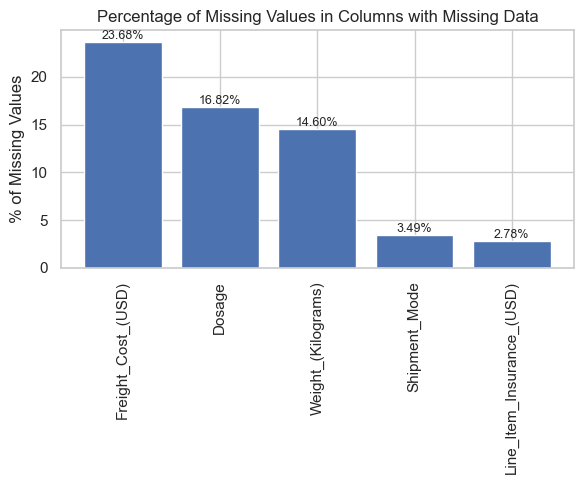

In [135]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum().sort_values(ascending=False)
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Calculate the total number of rows in the DataFrame
total_rows = len(df)
# Calculate the percentage of missing values in each column
percentage_missing_values = (columns_with_missing_values / total_rows) * 100
# Create a bar chart to visualize the percentage of missing values for selected columns
plt.figure(figsize=(6, 5))
bars = plt.bar(percentage_missing_values.index, percentage_missing_values.values)
plt.xticks(rotation=90)
plt.ylabel('% of Missing Values')
plt.title('Percentage of Missing Values in Columns with Missing Data')

# Add percentage information to the labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [136]:
df

ID PO_/_SO_# ASN/DN_#        Country  Fulfill_Via Vendor_INCO_Term  \
0          1      SCMS      ASN  Côte d'Ivoire  Direct Drop              EXW   
1          3      SCMS      ASN        Vietnam  Direct Drop              EXW   
2          4      SCMS      ASN  Côte d'Ivoire  Direct Drop              FCA   
3         15      SCMS      ASN        Vietnam  Direct Drop              EXW   
4         16      SCMS      ASN        Vietnam  Direct Drop              EXW   
...      ...       ...      ...            ...          ...              ...   
10319  86818        SO       DN       Zimbabwe     From RDC   N/A - From RDC   
10320  86819        SO       DN  Côte d'Ivoire     From RDC   N/A - From RDC   
10321  86821        SO       DN         Zambia     From RDC   N/A - From RDC   
10322  86822        SO       DN       Zimbabwe     From RDC   N/A - From RDC   
10323  86823        SO       DN       Zimbabwe     From RDC   N/A - From RDC   

      Shipment_Mode PQ_First_Sent_to_Client_Date Scheduled_Delivery_Date  \
0               Air                    04-Jan-09              2006-06-02   
1               Air                    04-Jan-09              2006-11-14   
2               Air                    04-Jan-09              2006-08-27   
3               Air                    04-Jan-09              2006-09-01   
4               Air                    04-Jan-09              2006-08-11   
...             ...                          ...                     ...   
10319         Truck                    16-Oct-14              2015-07-31   
10320         Truck                    24-Oct-14              2015-07-31   
10321         Truck                    12-Aug-14              2015-08-31   
10322         Truck                    01-Jul-15              2015-09-09   
10323         Truck                    16-Oct-14              2015-08-31   

      Delivered_to_Client_Date  ... Unit_of_Measure_(Per_Pack)  \
0                   2006-06-02  ...                         30   
1                   2006-11-14  ...                        240   
2                   2006-08-27  ...                        100   
3                   2006-09-01  ...                         60   
4                   2006-08-11  ...                         60   
...                        ...  ...                        ...   
10319               2015-07-15  ...                         60   
10320               2015-08-06  ...                         60   
10321               2015-08-25  ...                         30   
10322               2015-08-04  ...                         60   
10323               2015-08-04  ...                         60   

      Line_Item_Quantity Line_Item_Value Pack_Price  Unit_Price  \
0                     19          551.00      29.00        0.97   
1                   1000         6200.00       6.20        0.03   
2                    500        40000.00      80.00        0.80   
3                  31920       127360.80       3.99        0.07   
4                  38000       121600.00       3.20        0.05   
...                  ...             ...        ...         ...   
10319             166571       599655.60       3.60        0.06   
10320              21072       137389.44       6.52        0.11   
10321             514526      5140114.74       9.99        0.33   
10322              17465       113871.80       6.52        0.11   
10323              36639        72911.61       1.99        0.03   

                   Manufacturing_Site  First_Line_Designation  \
0            other_manufacturing_site                     Yes   
1           Aurobindo Unit III, India                     Yes   
2            other_manufacturing_site                     Yes   
3            other_manufacturing_site                     Yes   
4           Aurobindo Unit III, India                     Yes   
...                               ...                     ...   
10319        other_manufacturing_site                      No   
10320    Hetero Un

# impact of Categorical Features on Target Variable

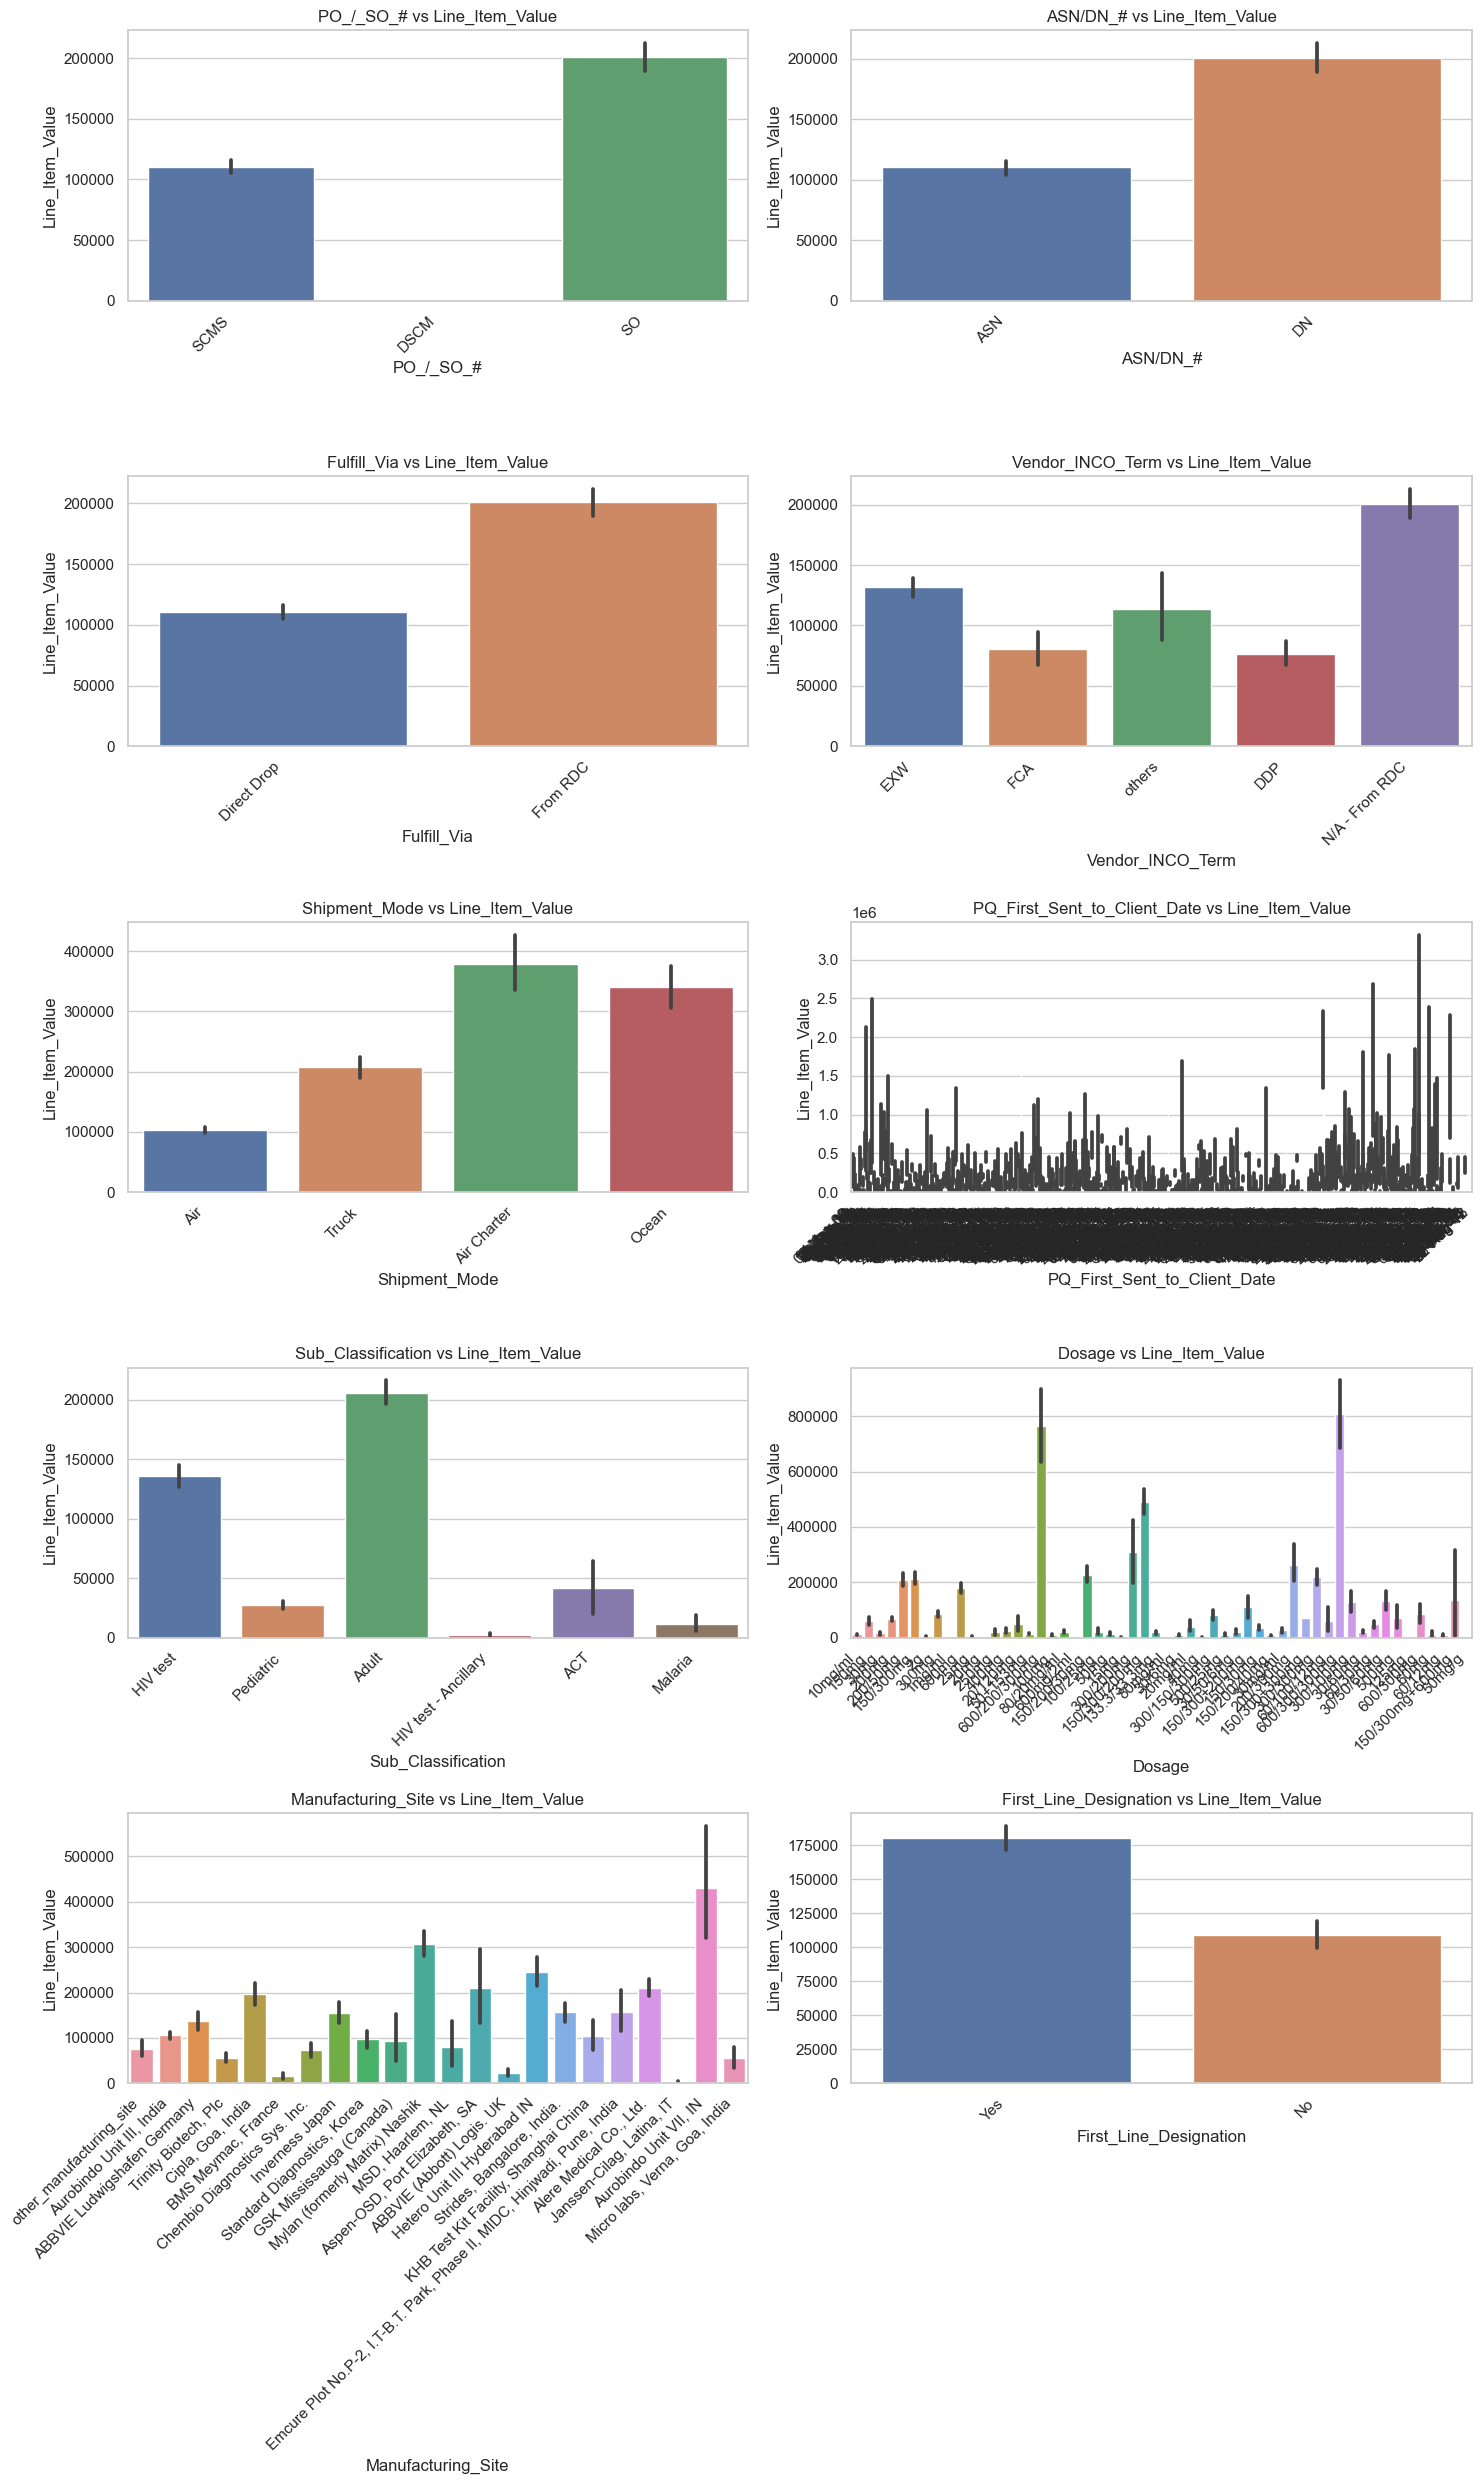

In [137]:
# Select categorical features and target variable
categorical_features = ['PO_/_SO_#', 'ASN/DN_#','Fulfill_Via', 'Vendor_INCO_Term',
                        'Shipment_Mode', 'PQ_First_Sent_to_Client_Date', 'Sub_Classification', 
                        'Dosage', 'Manufacturing_Site', 'First_Line_Designation']

target_variable = 'Line_Item_Value'

# Create subplots for each categorical feature
num_plots = len(categorical_features)
num_cols = 2  # Number of columns in the subplots grid
num_rows = (num_plots + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.barplot(x=feature, y=target_variable, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'{feature} vs {target_variable}')

# Adjust layout if there's an odd number of subplots
if num_plots % num_cols != 0:
    fig.delaxes(axes[num_plots])

plt.tight_layout()
plt.show()

In [138]:
df['Freight_Cost_(USD)']=df['Freight_Cost_(USD)'].astype('float')

# Imapact of Numerical Features on Target Variables

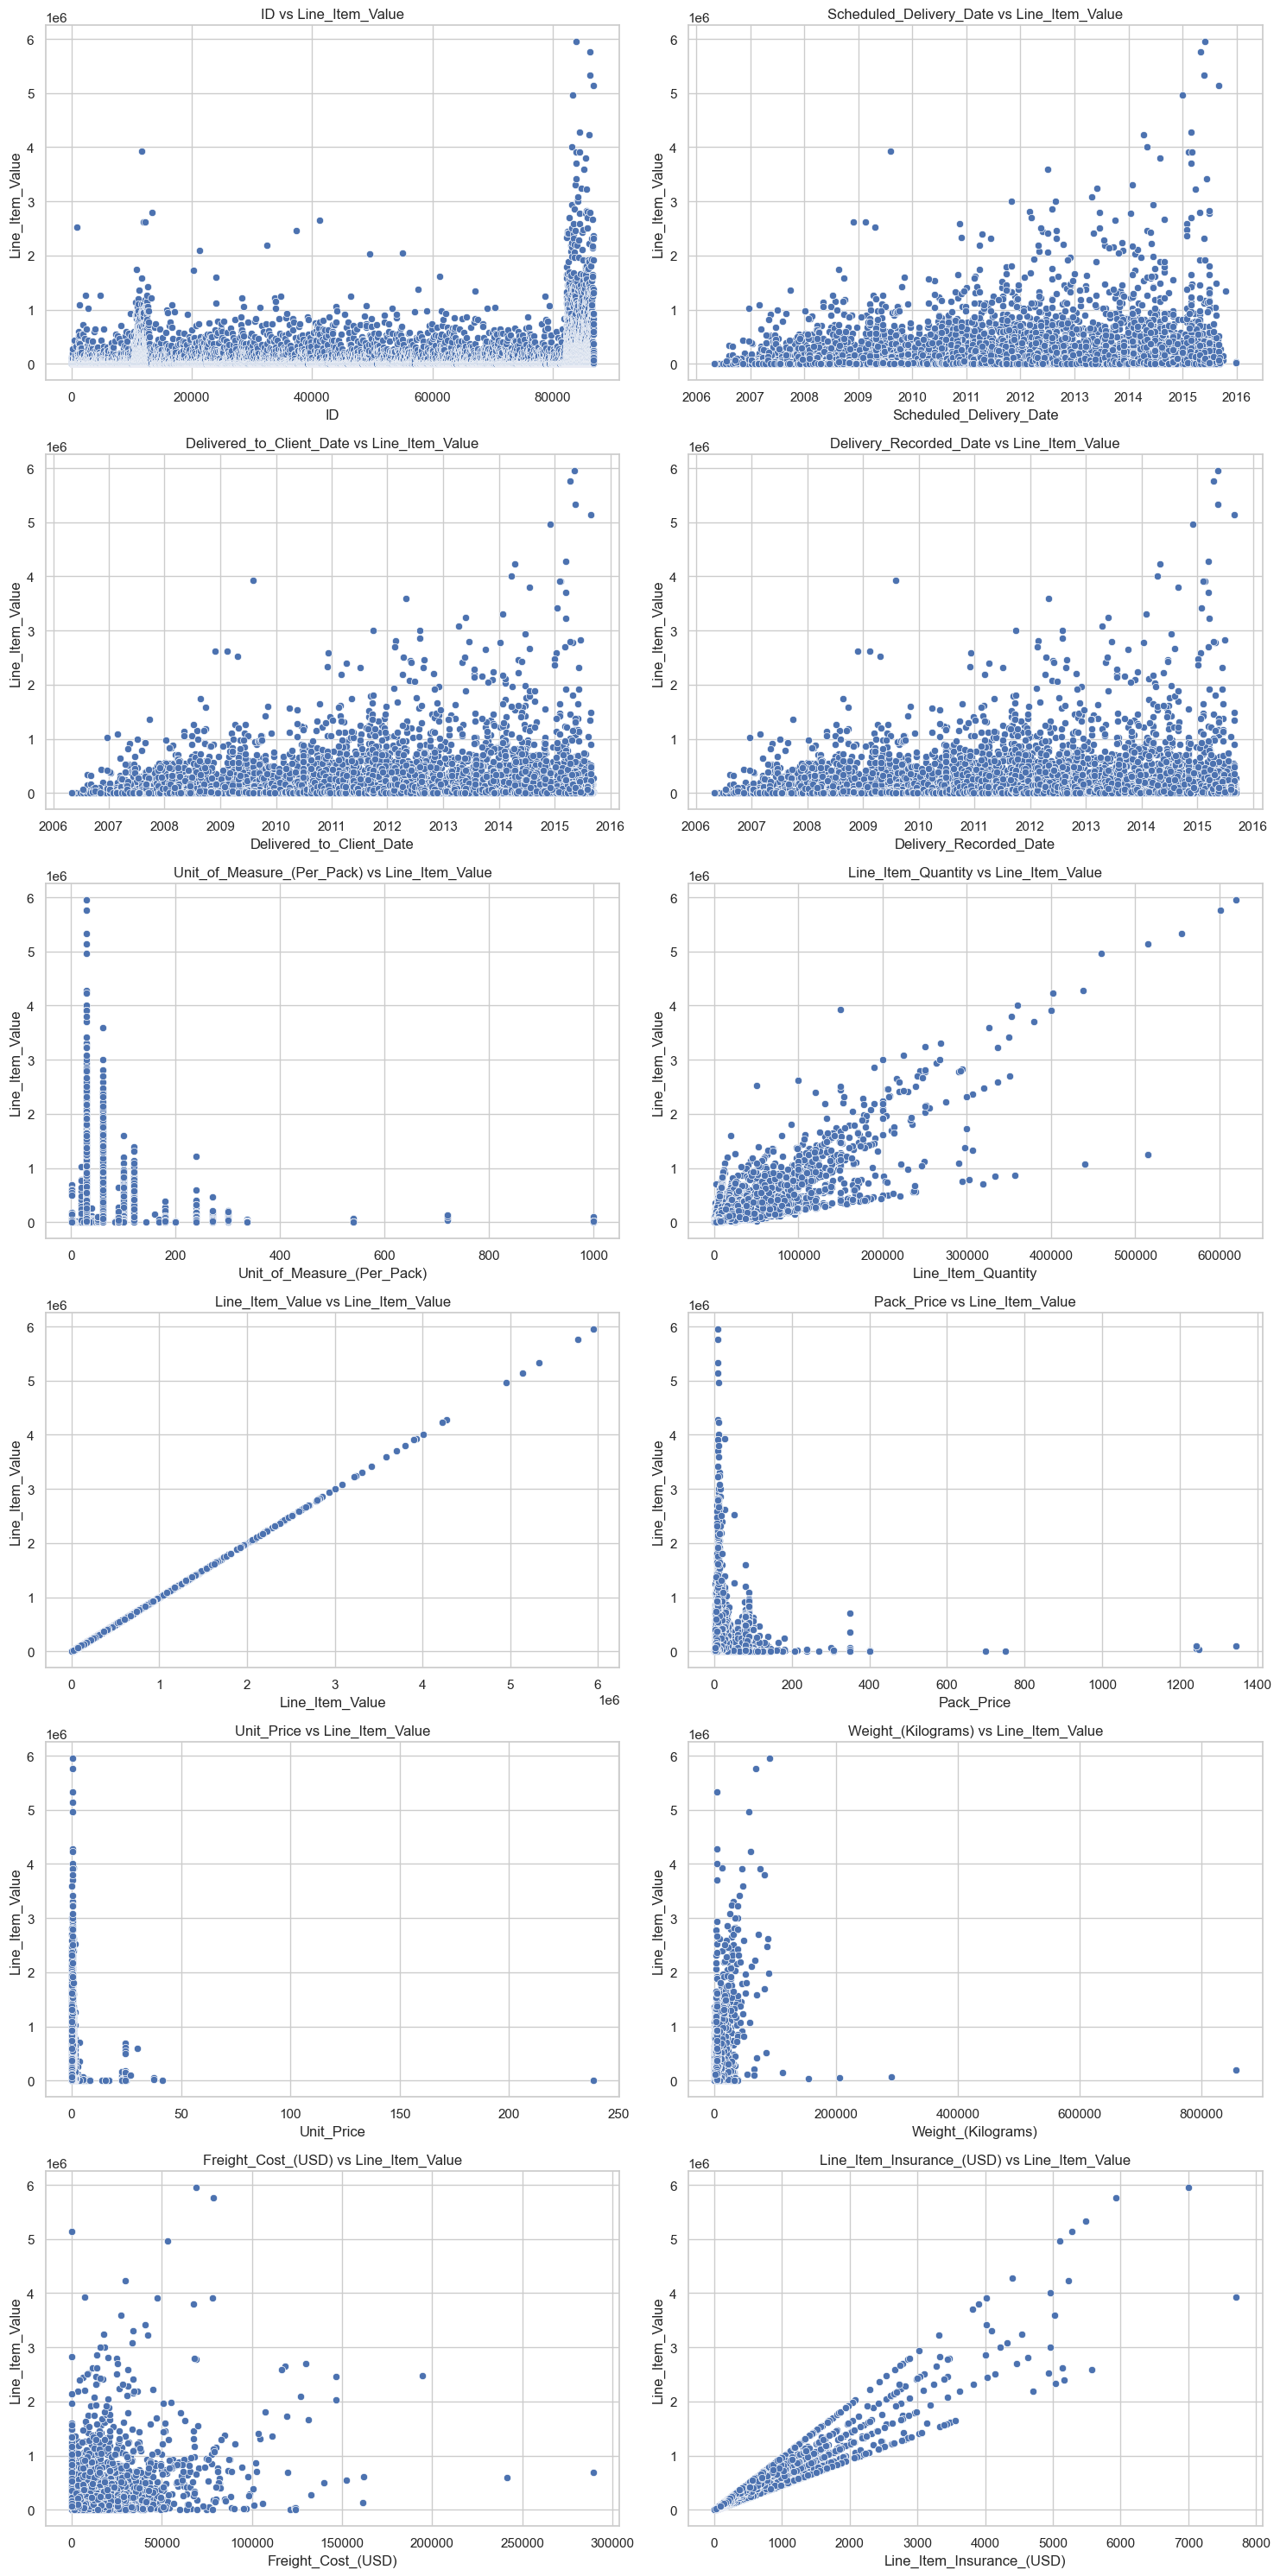

In [139]:
numeric_features=[cols for cols in df.columns if df[cols].dtype!='O']
target_variable = 'Line_Item_Value'

# Create subplots for each numeric feature
num_plots = len(numeric_features)
num_cols = 2  # Number of columns in the subplots grid
num_rows = (num_plots + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.scatterplot(x=feature, y=target_variable, data=df, ax=ax)
    ax.set_title(f'{feature} vs {target_variable}')
# Adjust layout if there's an odd number of subplots
if num_plots % num_cols != 0:
    fig.delaxes(axes[num_plots])
plt.tight_layout()
plt.show()

In [140]:
df[numeric_features]

ID Scheduled_Delivery_Date Delivered_to_Client_Date  \
0          1              2006-06-02               2006-06-02   
1          3              2006-11-14               2006-11-14   
2          4              2006-08-27               2006-08-27   
3         15              2006-09-01               2006-09-01   
4         16              2006-08-11               2006-08-11   
...      ...                     ...                      ...   
10319  86818              2015-07-31               2015-07-15   
10320  86819              2015-07-31               2015-08-06   
10321  86821              2015-08-31               2015-08-25   
10322  86822              2015-09-09               2015-08-04   
10323  86823              2015-08-31               2015-08-04   

      Delivery_Recorded_Date  Unit_of_Measure_(Per_Pack)  Line_Item_Quantity  \
0                 2006-06-02                          30                  19   
1                 2006-11-14                         240                1000   
2                 2006-08-27                         100                 500   
3                 2006-09-01                          60               31920   
4                 2006-08-11                          60               38000   
...                      ...                         ...                 ...   
10319             2015-07-20                          60              166571   
10320             2015-08-07                          60               21072   
10321             2015-09-03                          30              514526   
10322             2015-08-11                          60               17465   
10323             2015-08-11                          60               36639   

       Line_Item_Value  Pack_Price  Unit_Price  Weight_(Kilograms)  \
0               551.00       29.00        0.97                13.0   
1              6200.00        6.20        0.03               358.0   
2             40000.00       80.00        0.80               171.0   
3            127360.80        3.99        0.07              1855.0   
4            121600.00        3.20        0.05              7590.0   
...                ...         ...         ...                 ...   
10319        599655.60        3.60        0.06              4307.0   
10320        137389.44        6.52        0.11              4313.0   
10321       5140114.74        9.99        0.33                 NaN   
10322        113871.80        6.52        0.11              1392.0   
10323         72911.61        1.99        0.03                 NaN   

       Freight_Cost_(USD)  Line_Item_Insurance_(USD)  
0                  780.34                        NaN  
1                 4521.50                        NaN  
2                 1653.78                        NaN  
3                16007.06                        NaN  
4                45450.08                        NaN  
...                   ...                        ...  
10319                 NaN                     705.79  
10320                 NaN                     161.71  
10321                0.00                    5284.04  
10322                0.00                     134.03  
10323                0.00                      85.82  

[10324 rows x 12 columns]

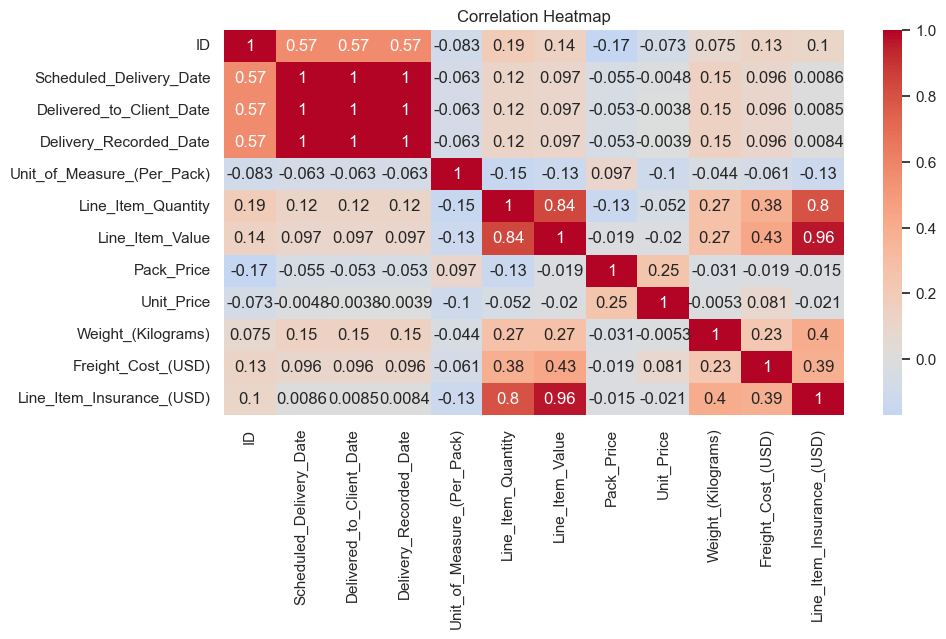

In [141]:
numeric_df = df[numeric_features]

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()
# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Inferences:

* Total_Cost is strongly correlated to column Line Item Value, Line Item Quantity, Line Item Insurance (USD).
* We have Line Item Value and Line Item Quantity with positive linear correlation of 0.84.
* Correlation of Line Item Insurance (USD) and Line Item Value is 0.96.
* Correlation of Line Item Insurance (USD) and Line Item Quantity is 0.80.



In [142]:
df.isna().sum().sort_values(ascending=False)

Freight_Cost_(USD)              2445
Dosage                          1736
Weight_(Kilograms)              1507
Shipment_Mode                    360
Line_Item_Insurance_(USD)        287
First_Line_Designation             0
Manufacturing_Site                 0
Unit_Price                         0
Pack_Price                         0
Line_Item_Value                    0
Line_Item_Quantity                 0
Unit_of_Measure_(Per_Pack)         0
ID                                 0
PO_/_SO_#                          0
Sub_Classification                 0
Delivery_Recorded_Date             0
Delivered_to_Client_Date           0
Scheduled_Delivery_Date            0
PQ_First_Sent_to_Client_Date       0
Vendor_INCO_Term                   0
Fulfill_Via                        0
Country                            0
ASN/DN_#                           0
Item_Description                   0
dtype: int64

In [143]:
numeric_features=['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Weight_(Kilograms)',
 'Freight_Cost_(USD)',
 'Line_Item_Insurance_(USD)']


In [144]:
df[numeric_features].skew()
#Since data is not in same scale it it highley skewed 

Unit_of_Measure_(Per_Pack)     4.302502
Line_Item_Quantity             5.038315
Line_Item_Value                5.837020
Pack_Price                    12.988432
Unit_Price                    40.584849
Weight_(Kilograms)            40.845757
Freight_Cost_(USD)             4.944091
Line_Item_Insurance_(USD)      4.827162
dtype: float64

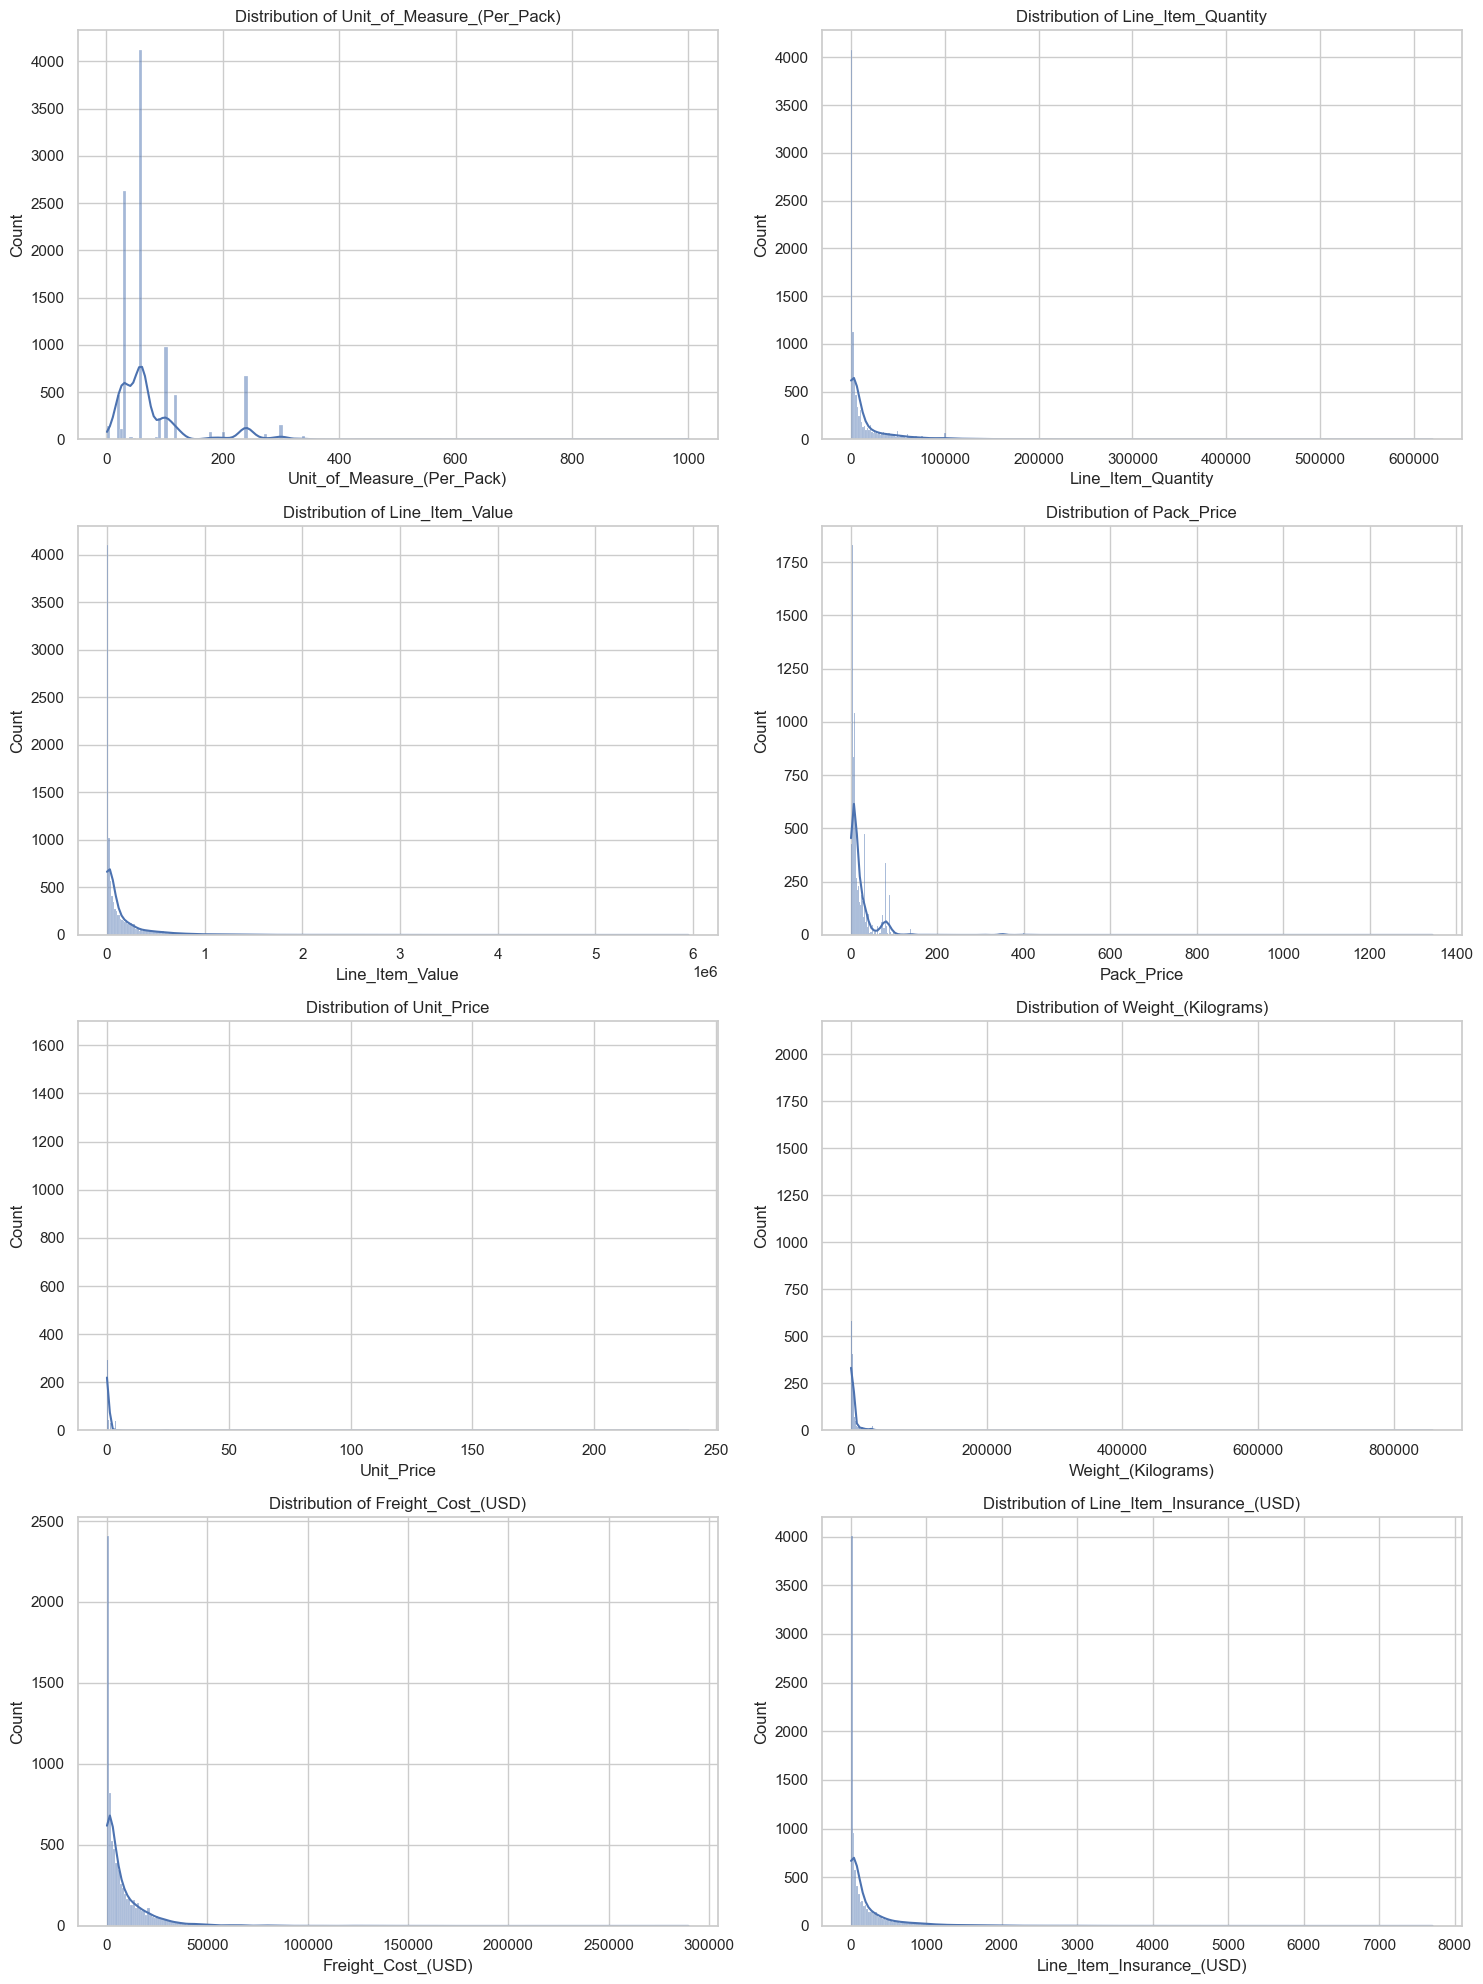

In [145]:
# Create subplots for each numerical feature
num_plots = len(numeric_features)
num_cols = 2  # Number of columns in the subplots grid
num_rows = (num_plots + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

# Adjust layout if there's an odd number of subplots
if num_plots % num_cols != 0:
    fig.delaxes(axes[num_plots])
plt.tight_layout()
plt.show()

Since our numerical features are not in same scale and has some missing values also hence it is not normaley distributed

# Feature Engineering 

In [146]:
df['PQ_First_Sent_to_Client_Date']=pd.to_datetime(df['PQ_First_Sent_to_Client_Date'], format='%d-%b-%y')

In [147]:
df['PQ_First_Sent_to_Client_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10324 entries, 0 to 10323
Series name: PQ_First_Sent_to_Client_Date
Non-Null Count  Dtype         
--------------  -----         
10324 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 80.8 KB


In [148]:
df[['PQ_First_Sent_to_Client_Date','Delivery_Recorded_Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PQ_First_Sent_to_Client_Date  10324 non-null  datetime64[ns]
 1   Delivery_Recorded_Date        10324 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 161.4 KB


In [149]:
df[['PQ_First_Sent_to_Client_Date','Delivery_Recorded_Date']]

PQ_First_Sent_to_Client_Date Delivery_Recorded_Date
0                       2009-01-04             2006-06-02
1                       2009-01-04             2006-11-14
2                       2009-01-04             2006-08-27
3                       2009-01-04             2006-09-01
4                       2009-01-04             2006-08-11
...                            ...                    ...
10319                   2014-10-16             2015-07-20
10320                   2014-10-24             2015-08-07
10321                   2014-08-12             2015-09-03
10322                   2015-07-01             2015-08-11
10323                   2014-10-16             2015-08-11

[10324 rows x 2 columns]

From these two features we can make one feature day_to_process 

In [150]:
df['Days_to_Process']=df['Delivery_Recorded_Date']-df['PQ_First_Sent_to_Client_Date']

In [151]:
df['Days_to_Process']=df['Days_to_Process'].dt.days.astype('int64')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   PO_/_SO_#                     10324 non-null  object        
 2   ASN/DN_#                      10324 non-null  object        
 3   Country                       10324 non-null  object        
 4   Fulfill_Via                   10324 non-null  object        
 5   Vendor_INCO_Term              10324 non-null  object        
 6   Shipment_Mode                 9964 non-null   object        
 7   PQ_First_Sent_to_Client_Date  10324 non-null  datetime64[ns]
 8   Scheduled_Delivery_Date       10324 non-null  datetime64[ns]
 9   Delivered_to_Client_Date      10324 non-null  datetime64[ns]
 10  Delivery_Recorded_Date        10324 non-null  datetime64[ns]
 11  Sub_Classification          

In [153]:
new_numeric_features=[cols for cols in df.columns if df[cols].dtype!='O']

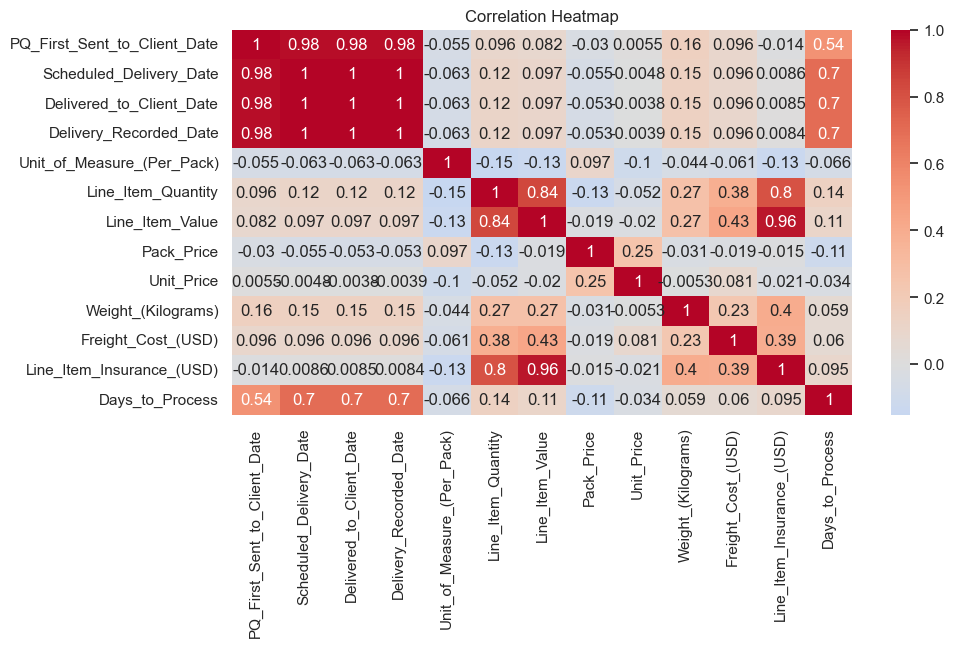

In [145]:
numeric_df = df[new_numeric_features]

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()
# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Lets see again impact of numeric features

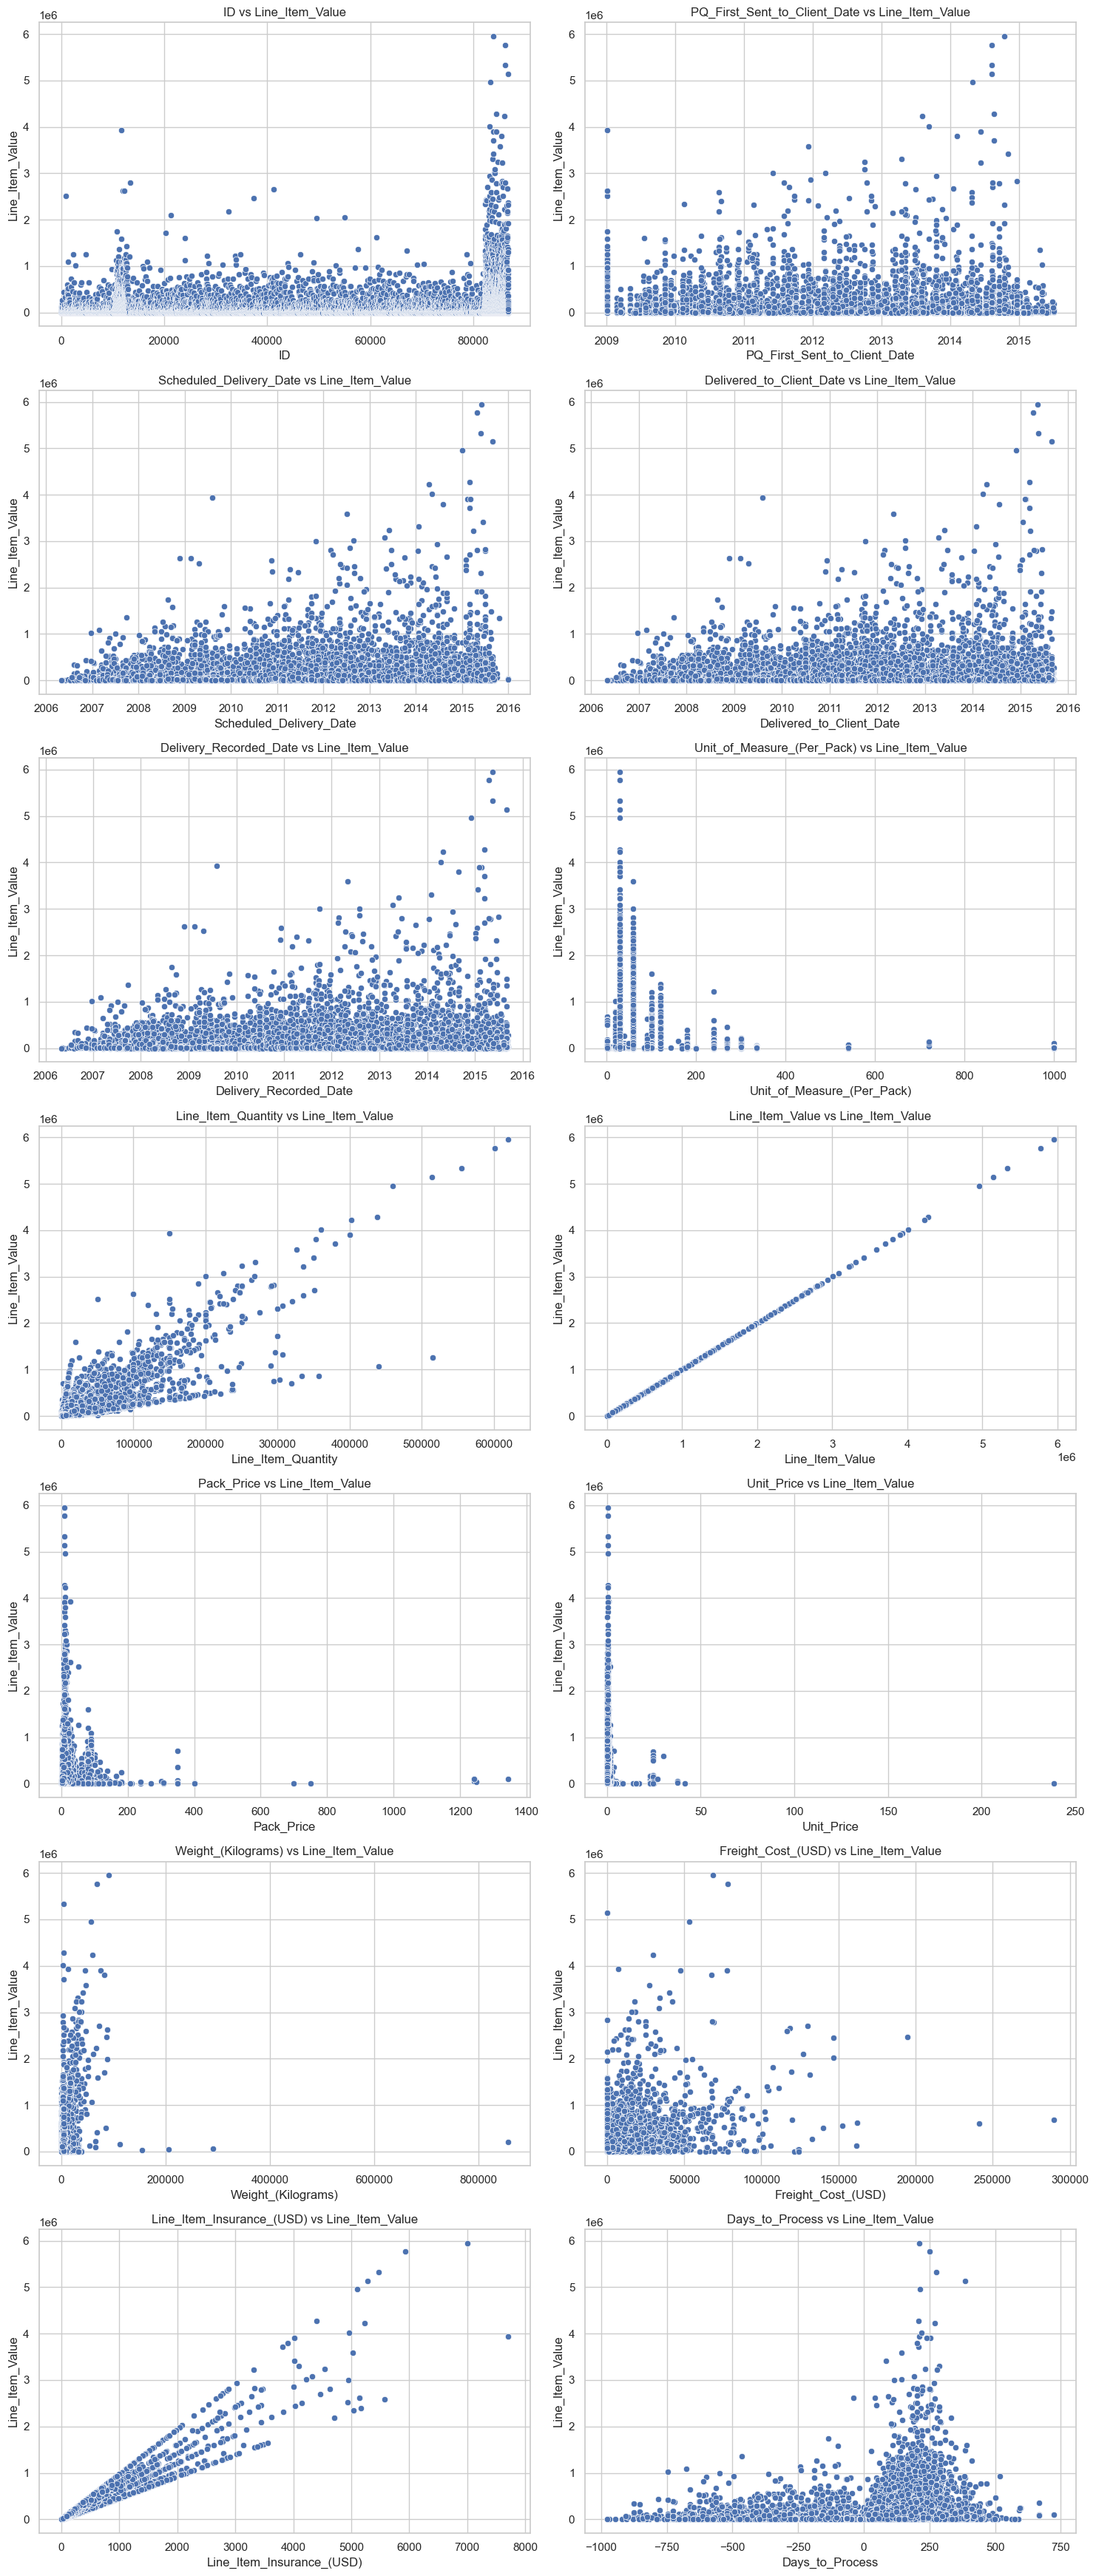

In [154]:
numeric_features=[cols for cols in df.columns if df[cols].dtype!='O']
target_variable = 'Line_Item_Value'

# Create subplots for each numeric feature
num_plots = len(numeric_features)
num_cols = 2  # Number of columns in the subplots grid
num_rows = (num_plots + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.scatterplot(x=feature, y=target_variable, data=df, ax=ax)
    ax.set_title(f'{feature} vs {target_variable}')
# Adjust layout if there's an odd number of subplots
if num_plots % num_cols != 0:
    fig.delaxes(axes[num_plots])
plt.tight_layout()
plt.show()

In [155]:
df.drop(columns=['PQ_First_Sent_to_Client_Date','Scheduled_Delivery_Date','Delivered_to_Client_Date','Delivery_Recorded_Date'],axis=1,inplace=True)

In [156]:
len(df.columns)

21

In [157]:
df.drop(columns='Manufacturing_Site',axis=1,inplace=True)

In [158]:
#dropping Dosage column since its information is provided in Sub_Classification column
df.drop(columns='Dosage',axis=1,inplace=True)

In [159]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'Sub_Classification',
       'Item_Description', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'First_Line_Designation',
       'Weight_(Kilograms)', 'Freight_Cost_(USD)', 'Line_Item_Insurance_(USD)',
       'Days_to_Process'],
      dtype='object')

In [160]:
df.to_csv('Preprocessed_df.csv',index=False)

In [161]:
unrelevant_columns=['ID','Project_Code','PQ_#','Item_Description','Managed_By','PO_Sent_to_Vendor_Date','Product_Group','Molecule/Test_Type','Brand','Dosage_Form','Dosage','Manufacturing_Site','Vendor','PQ_First_Sent_to_Client_Date','Scheduled_Delivery_Date','Delivered_to_Client_Date','Delivery_Recorded_Date']

In [162]:
df.columns

Index(['ID', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Fulfill_Via',
       'Vendor_INCO_Term', 'Shipment_Mode', 'Sub_Classification',
       'Item_Description', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'First_Line_Designation',
       'Weight_(Kilograms)', 'Freight_Cost_(USD)', 'Line_Item_Insurance_(USD)',
       'Days_to_Process'],
      dtype='object')

f:\Shipping_Pricing_Prediction\myvenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


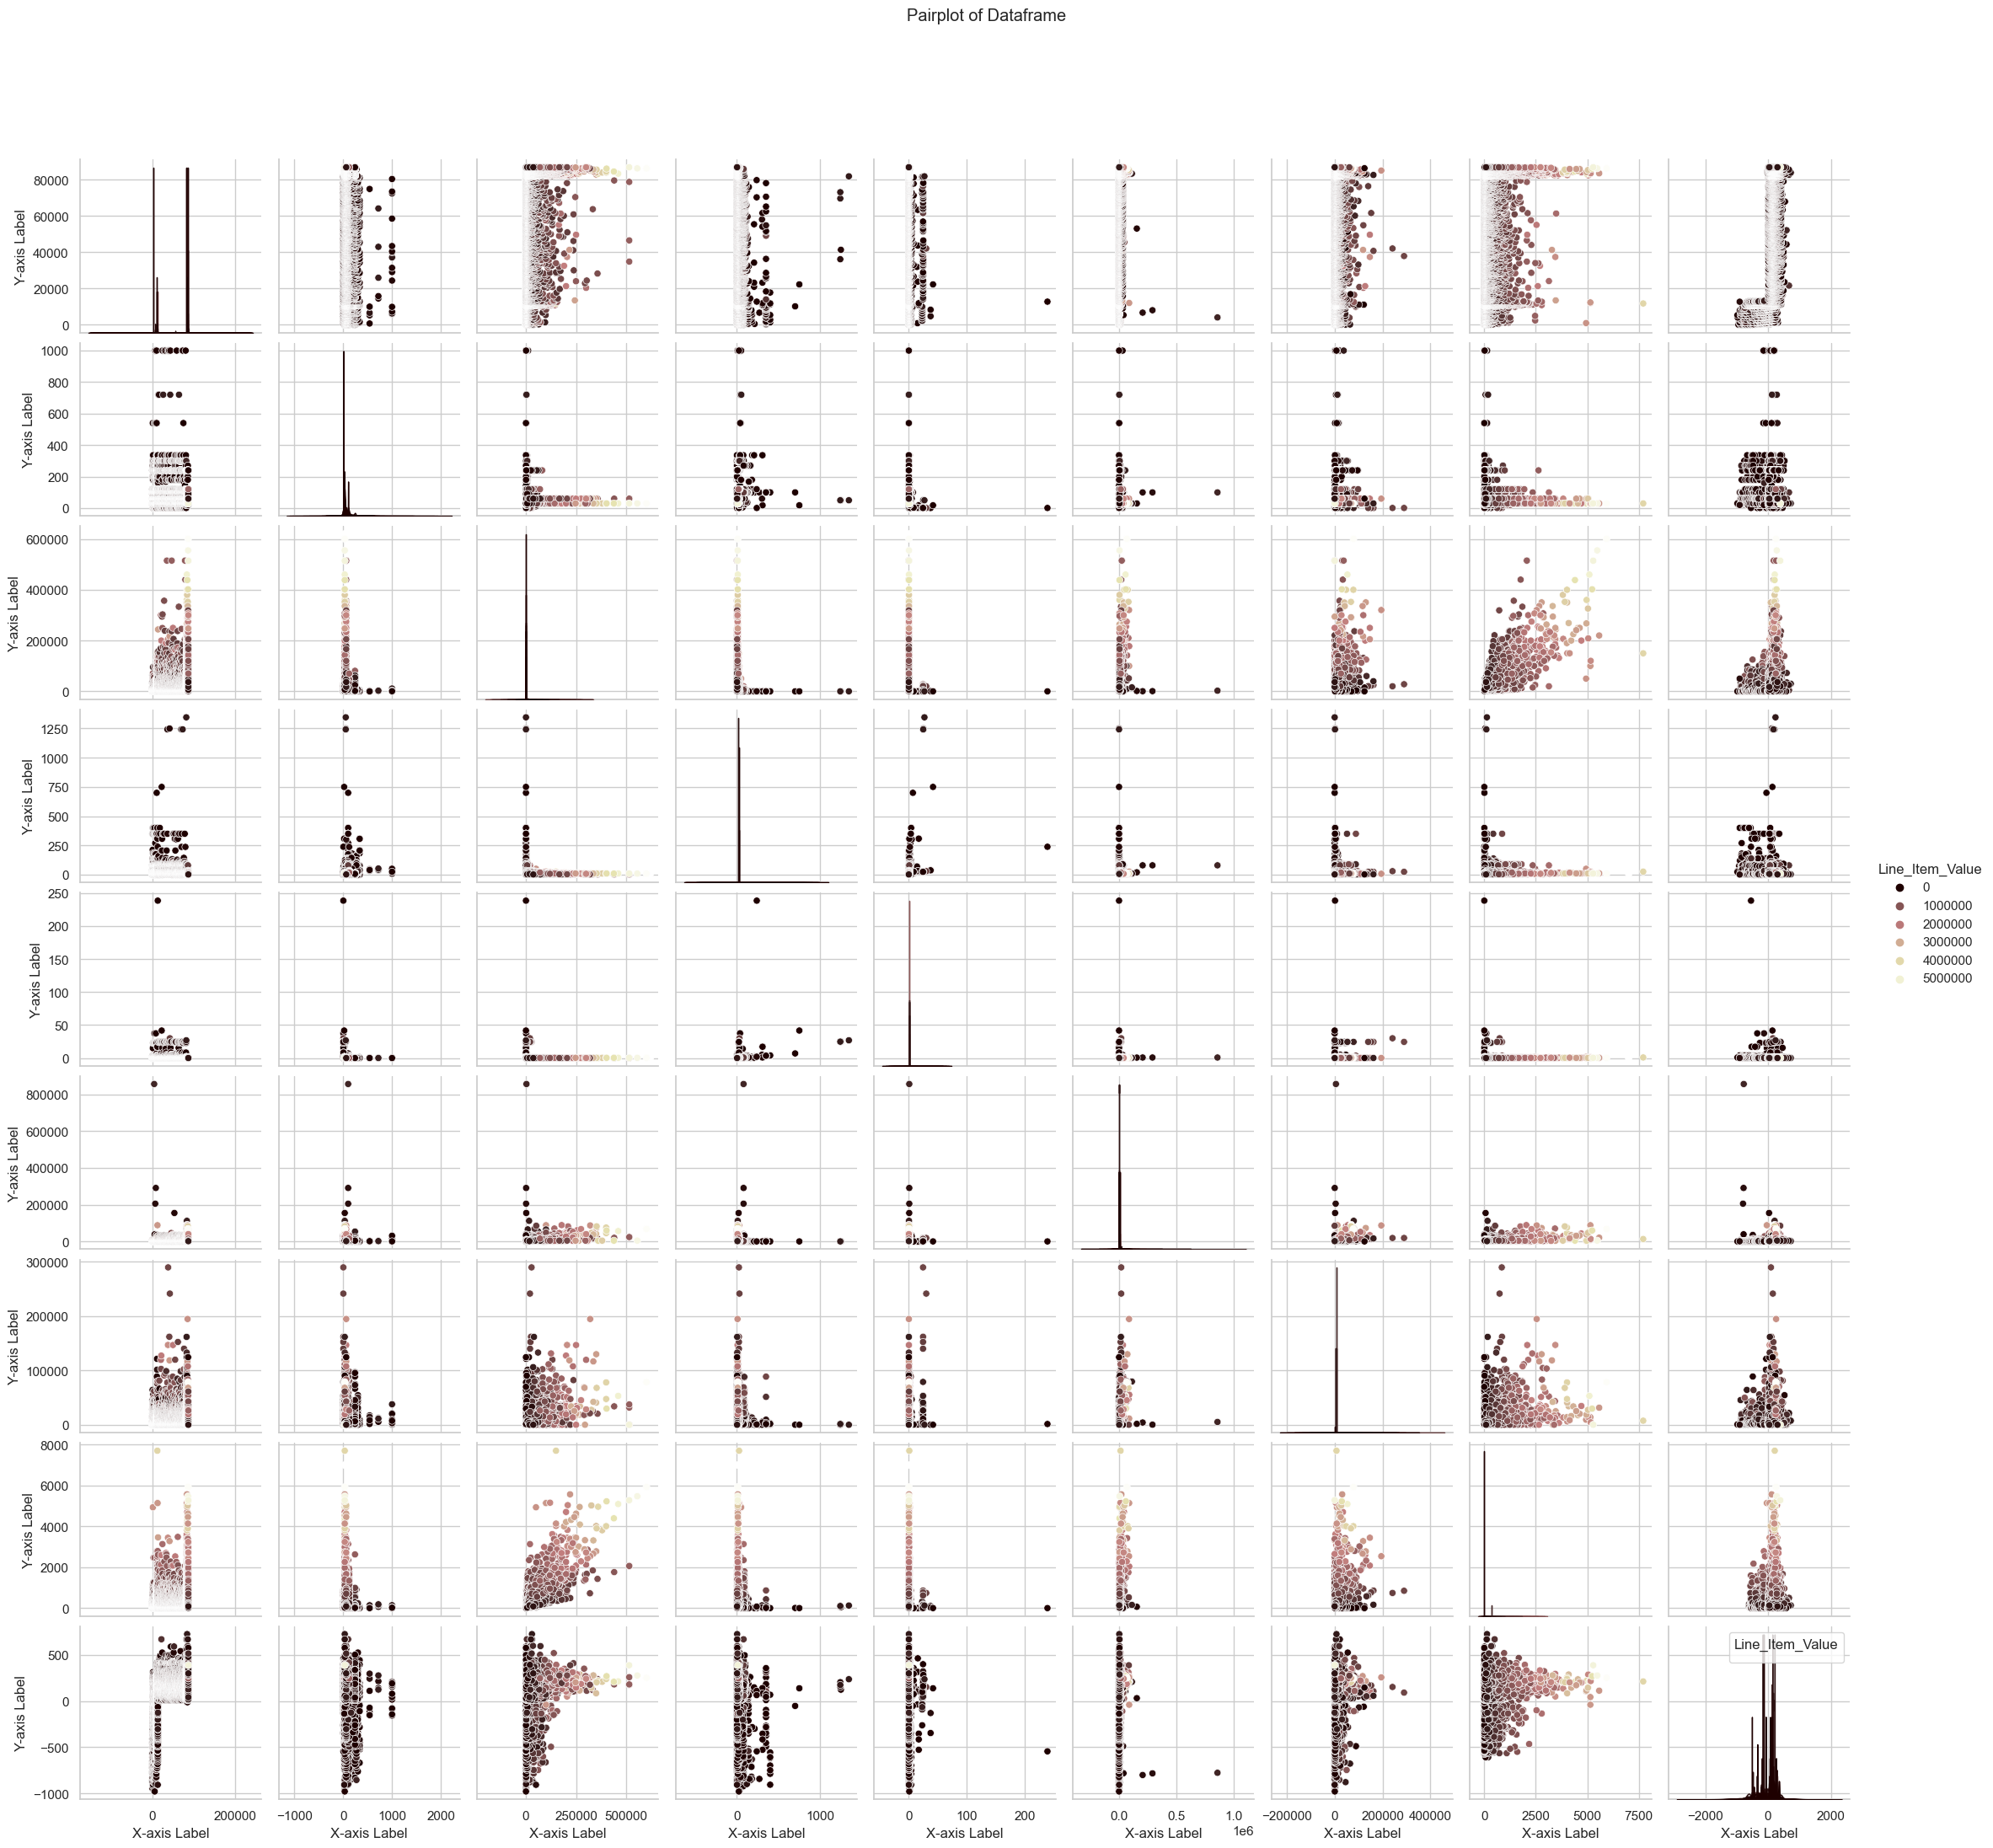

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot with a pink shade for the target column
g = sns.pairplot(df, hue='Line_Item_Value', palette='pink', diag_kind='kde')  # Use 'kde' for distribution plots

# Set custom labels for x and y axes
g.set(xlabel="X-axis Label", ylabel="Y-axis Label")

# Add a title to the entire pairplot
g.fig.suptitle("Pairplot of Dataframe")

# Adjust the title position
plt.subplots_adjust(top=0.9)

# Add a legend for the target variable
plt.legend(title='Line_Item_Value', loc='upper right')

# Show the pairplot
plt.show()
